## 1. Linearidade
#### A relação entre as variáveis independentes e a variável dependente deve ser linear. O modelo assume que Y pode ser expresso como uma combinação linear das variáveis X.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, anderson, jarque_bera, kstest, probplot
from sklearn.datasets import make_regression

# Configuração
np.random.seed(42)
n = 200

In [6]:
# ============================================
# EXEMPLO 1: Relação LINEAR (adequada)
# ============================================
print("=" * 60)
print("EXEMPLO 1: RELAÇÃO LINEAR (Adequada para Regressão Linear)")
print("=" * 60)

# Gerando dados com relação linear
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
# Y é uma combinação LINEAR de X1 e X2
Y_linear = 3 + 2*X1 + 1.5*X2 + np.random.normal(0, 2, n)

# Criando o modelo
X_linear = np.column_stack([X1, X2])
modelo_linear = LinearRegression()
modelo_linear.fit(X_linear, Y_linear)

# Previsões
Y_pred_linear = modelo_linear.predict(X_linear)

print(f"\nEquação real: Y = 3 + 2*X1 + 1.5*X2 + ruído")
print(f"Equação estimada: Y = {modelo_linear.intercept_:.2f} + {modelo_linear.coef_[0]:.2f}*X1 + {modelo_linear.coef_[1]:.2f}*X2")
print(f"R² Score: {r2_score(Y_linear, Y_pred_linear):.4f}")

EXEMPLO 1: RELAÇÃO LINEAR (Adequada para Regressão Linear)

Equação real: Y = 3 + 2*X1 + 1.5*X2 + ruído
Equação estimada: Y = 3.16 + 2.00*X1 + 1.43*X2
R² Score: 0.9083


In [7]:
# ============================================
# EXEMPLO 2: Relação NÃO-LINEAR (inadequada)
# ============================================
print("\n" + "=" * 60)
print("EXEMPLO 2: RELAÇÃO NÃO-LINEAR (Inadequada)")
print("=" * 60)

# Gerando dados com relação NÃO-LINEAR (quadrática)
X1_nl = np.random.uniform(0, 10, n)
X2_nl = np.random.uniform(0, 5, n)
# Y tem uma relação QUADRÁTICA (não-linear)
Y_nonlinear = 3 + 2*X1_nl**2 + 1.5*X2_nl + np.random.normal(0, 5, n)

# Tentando ajustar com modelo linear simples
X_nonlinear = np.column_stack([X1_nl, X2_nl])
modelo_nonlinear = LinearRegression()
modelo_nonlinear.fit(X_nonlinear, Y_nonlinear)

Y_pred_nonlinear = modelo_nonlinear.predict(X_nonlinear)

print(f"\nEquação real: Y = 3 + 2*X1² + 1.5*X2 + ruído (NÃO-LINEAR)")
print(f"Modelo linear estimado: Y = {modelo_nonlinear.intercept_:.2f} + {modelo_nonlinear.coef_[0]:.2f}*X1 + {modelo_nonlinear.coef_[1]:.2f}*X2")
print(f"R² Score: {r2_score(Y_nonlinear, Y_pred_nonlinear):.4f} (RUIM!)")


EXEMPLO 2: RELAÇÃO NÃO-LINEAR (Inadequada)

Equação real: Y = 3 + 2*X1² + 1.5*X2 + ruído (NÃO-LINEAR)
Modelo linear estimado: Y = -33.08 + 20.30*X1 + 2.03*X2
R² Score: 0.9331 (RUIM!)


In [8]:
# ============================================
# EXEMPLO 3: CORREÇÃO - Transformação de variáveis
# ============================================
print("\n" + "=" * 60)
print("EXEMPLO 3: CORREÇÃO com transformação (X1²)")
print("=" * 60)

# Adicionando X1² como nova variável para capturar a não-linearidade
X_transformed = np.column_stack([X1_nl, X1_nl**2, X2_nl])
modelo_corrigido = LinearRegression()
modelo_corrigido.fit(X_transformed, Y_nonlinear)

Y_pred_corrigido = modelo_corrigido.predict(X_transformed)

print(f"\nModelo corrigido: Y = {modelo_corrigido.intercept_:.2f} + {modelo_corrigido.coef_[0]:.2f}*X1 + {modelo_corrigido.coef_[1]:.2f}*X1² + {modelo_corrigido.coef_[2]:.2f}*X2")
print(f"R² Score: {r2_score(Y_nonlinear, Y_pred_corrigido):.4f} (MUITO MELHOR!)")


EXEMPLO 3: CORREÇÃO com transformação (X1²)

Modelo corrigido: Y = 3.67 + -0.31*X1 + 2.04*X1² + 1.71*X2
R² Score: 0.9935 (MUITO MELHOR!)


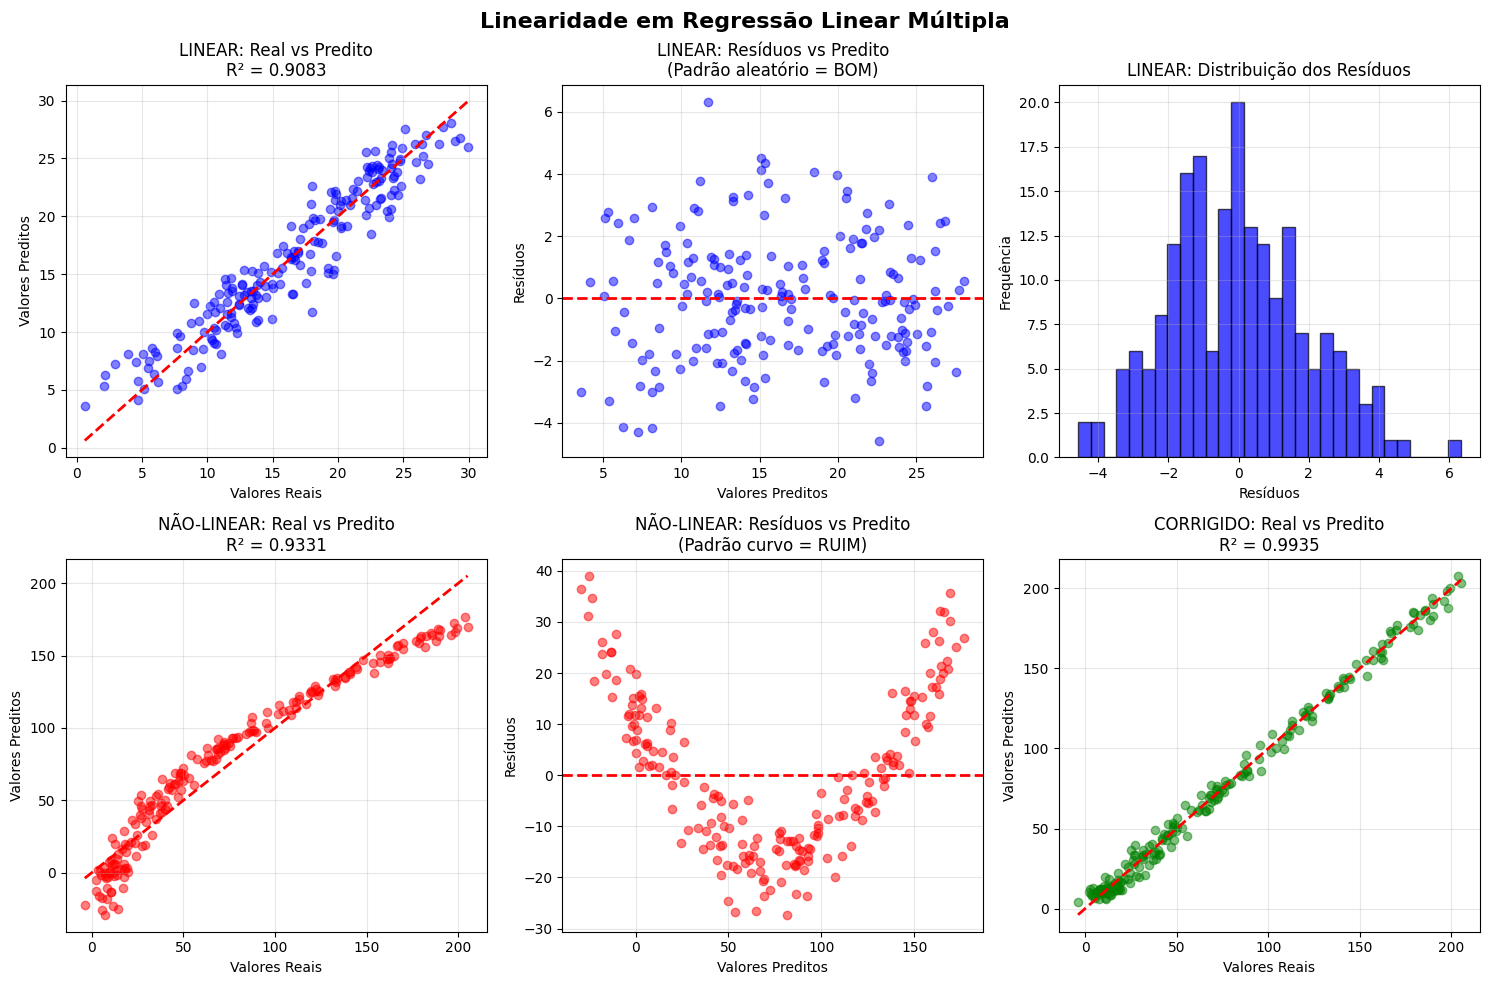

In [20]:
# ============================================
# VISUALIZAÇÕES
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Linearidade em Regressão Linear Múltipla', fontsize=16, fontweight='bold')

# Linha 1: Relação LINEAR
# Plot 1: Valores Reais vs Preditos
axes[0, 0].scatter(Y_linear, Y_pred_linear, alpha=0.5, color='blue')
axes[0, 0].plot([Y_linear.min(), Y_linear.max()], [Y_linear.min(), Y_linear.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valores Reais')
axes[0, 0].set_ylabel('Valores Preditos')
axes[0, 0].set_title(f'LINEAR: Real vs Predito\nR² = {r2_score(Y_linear, Y_pred_linear):.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Resíduos vs Valores Preditos
residuos_linear = Y_linear - Y_pred_linear
axes[0, 1].scatter(Y_pred_linear, residuos_linear, alpha=0.5, color='blue')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Valores Preditos')
axes[0, 1].set_ylabel('Resíduos')
axes[0, 1].set_title('LINEAR: Resíduos vs Predito\n(Padrão aleatório = BOM)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribuição dos Resíduos
axes[0, 2].hist(residuos_linear, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0, 2].set_xlabel('Resíduos')
axes[0, 2].set_ylabel('Frequência')
axes[0, 2].set_title('LINEAR: Distribuição dos Resíduos')
axes[0, 2].grid(True, alpha=0.3)

# Linha 2: Relação NÃO-LINEAR (sem correção)
# Plot 4: Valores Reais vs Preditos
axes[1, 0].scatter(Y_nonlinear, Y_pred_nonlinear, alpha=0.5, color='red')
axes[1, 0].plot([Y_nonlinear.min(), Y_nonlinear.max()], [Y_nonlinear.min(), Y_nonlinear.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Valores Reais')
axes[1, 0].set_ylabel('Valores Preditos')
axes[1, 0].set_title(f'NÃO-LINEAR: Real vs Predito\nR² = {r2_score(Y_nonlinear, Y_pred_nonlinear):.4f}')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Resíduos vs Valores Preditos
residuos_nonlinear = Y_nonlinear - Y_pred_nonlinear
axes[1, 1].scatter(Y_pred_nonlinear, residuos_nonlinear, alpha=0.5, color='red')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Valores Preditos')
axes[1, 1].set_ylabel('Resíduos')
axes[1, 1].set_title('NÃO-LINEAR: Resíduos vs Predito\n(Padrão curvo = RUIM)')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Comparação com modelo corrigido
axes[1, 2].scatter(Y_nonlinear, Y_pred_corrigido, alpha=0.5, color='green')
axes[1, 2].plot([Y_nonlinear.min(), Y_nonlinear.max()], [Y_nonlinear.min(), Y_nonlinear.max()], 'r--', lw=2)
axes[1, 2].set_xlabel('Valores Reais')
axes[1, 2].set_ylabel('Valores Preditos')
axes[1, 2].set_title(f'CORRIGIDO: Real vs Predito\nR² = {r2_score(Y_nonlinear, Y_pred_corrigido):.4f}')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# ============================================
# CONCLUSÕES
# ============================================
print("\n" + "=" * 60)
print("CONCLUSÕES:")
print("=" * 60)
print("""
1. Quando a relação é LINEAR:
   - O modelo captura bem a relação
   - R² é alto
   - Resíduos não têm padrão (aleatórios)

2. Quando a relação é NÃO-LINEAR:
   - O modelo linear simples falha
   - R² é baixo
   - Resíduos mostram PADRÃO (curva)
   
3. SOLUÇÃO para não-linearidade:
   - Transformar variáveis (X², log(X), √X, etc.)
   - Adicionar termos polinomiais
   - Usar modelos não-lineares""")


CONCLUSÕES:

1. Quando a relação é LINEAR:
   - O modelo captura bem a relação
   - R² é alto
   - Resíduos não têm padrão (aleatórios)

2. Quando a relação é NÃO-LINEAR:
   - O modelo linear simples falha
   - R² é baixo
   - Resíduos mostram PADRÃO (curva)

3. SOLUÇÃO para não-linearidade:
   - Transformar variáveis (X², log(X), √X, etc.)
   - Adicionar termos polinomiais
   - Usar modelos não-lineares


## 2. Independência dos Resíduos
#### As observações devem ser independentes entre si. Os erros de uma observação não devem estar correlacionados com os erros de outras observações (ausência de autocorrelação).

## **RUÍDO (Noise)**

É a variação **natural e aleatória** que existe nos dados reais. Representa:

- **Fatores não medidos** que influenciam Y
- **Erros de medição** dos instrumentos
- **Variabilidade natural** do fenômeno
- **Simplificações** do modelo

**Exemplo prático:**
Imagine prever o preço de uma casa (Y) com base em área (X₁) e quartos (X₂):

```
Preço Real = 100.000 + 500×Área + 10.000×Quartos + RUÍDO

RUÍDO pode ser:
- Localização específica da rua
- Estado de conservação
- Vista da janela
- Negociação do vendedor
- Humor do comprador no dia
```

No código Python, simulo o ruído com:
```python
np.random.normal(0, 2, n)  # Distribuição normal, média 0, desvio 2
```

---

## **RESÍDUOS (Residuals)**

São os **erros de previsão** do modelo. É a diferença entre o valor real e o valor que o modelo previu:

**Resíduo = Valor Real - Valor Previsto**

**Exemplo numérico:**
```
Casa 1:
- Preço Real: R$ 250.000
- Preço Previsto pelo modelo: R$ 245.000
- Resíduo: 250.000 - 245.000 = R$ 5.000

Casa 2:
- Preço Real: R$ 180.000
- Preço Previsto: R$ 185.000
- Resíduo: 180.000 - 185.000 = -R$ 5.000
```

---

## **Diferença Entre Ruído e Resíduos**

| Aspecto | RUÍDO | RESÍDUOS |
|---------|-------|----------|
| **O que é** | Variação real nos dados | Erro do modelo |
| **Quando existe** | Sempre (natureza dos dados) | Após treinar o modelo |
| **Ideal** | Pequeno e aleatório | Pequeno e aleatório |
| **Fórmula** | Y_real = f(X) + ruído | resíduo = Y_real - Y_previsto |

---

## **Visualização Prática**

Vou criar um exemplo visual para você entender melhor:Agora criei uma explicação visual completa! 

## **Resumindo de forma simples:**

### **RUÍDO** 🎲
É a "bagunça natural" da vida real:
- Uma casa vale R$ 250.000, mas por ter uma vista legal, vale R$ 255.000
- Você mede sua altura: 1,75m, mas o instrumento tem imprecisão de ±0,5cm
- O tempo de viagem ao trabalho varia por trânsito aleatório

### **RESÍDUOS** 📊
É o quanto o modelo "errou":
- Modelo previu: R$ 248.000
- Valor real: R$ 255.000
- Resíduo: +R$ 7.000 (modelo subestimou)

## **Analogia do dia-a-dia:**

Imagine que você está atirando dardos em um alvo:
- **RUÍDO**: O vento que desvia os dardos (você não controla)
- **RESÍDUOS**: A distância entre onde o dardo caiu e o centro do alvo

**Bom atirador (bom modelo)**: Resíduos pequenos, mesmo com vento
**Mau atirador (mau modelo)**: Resíduos grandes, todos para o mesmo lado

Execute o código para ver os gráficos com setas mostrando visualmente o ruído e os resíduos!

In [23]:
# Configuração
np.random.seed(42)
n = 50

# ============================================
# GERANDO DADOS COM RUÍDO
# ============================================
print("=" * 70)
print("ENTENDENDO RUÍDO E RESÍDUOS")
print("=" * 70)

# Variável independente
X = np.linspace(0, 10, n)

# RELAÇÃO PERFEITA (sem ruído)
Y_perfeito = 5 + 2 * X

# RUÍDO (fatores aleatórios da vida real)
ruido = np.random.normal(0, 3, n)  # Média 0, desvio padrão 3

# DADOS REAIS = Relação perfeita + RUÍDO
Y_real = Y_perfeito + ruido

print("\n📊 EXEMPLOS DE DADOS:")
print("-" * 70)
print(f"{'X':<10} {'Y Perfeito':<15} {'Ruído':<15} {'Y Real':<15}")
print("-" * 70)
for i in range(5):
    print(f"{X[i]:<10.2f} {Y_perfeito[i]:<15.2f} {ruido[i]:<15.2f} {Y_real[i]:<15.2f}")
print("...")

# ============================================
# TREINANDO O MODELO
# ============================================
modelo = LinearRegression()
modelo.fit(X.reshape(-1, 1), Y_real)

# PREVISÕES do modelo
Y_previsto = modelo.predict(X.reshape(-1, 1))

# RESÍDUOS = Real - Previsto
residuos = Y_real - Y_previsto

print("\n🤖 MODELO TREINADO:")
print("-" * 70)
print(f"Equação Real (desconhecida):  Y = 5.00 + 2.00*X")
print(f"Equação Estimada pelo Modelo: Y = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f}*X")

print("\n📈 ANÁLISE DE PREVISÕES:")
print("-" * 70)
print(f"{'X':<10} {'Y Real':<15} {'Y Previsto':<15} {'Resíduo':<15}")
print("-" * 70)
for i in range(5):
    print(f"{X[i]:<10.2f} {Y_real[i]:<15.2f} {Y_previsto[i]:<15.2f} {residuos[i]:<15.2f}")
print("...")

print("\n📊 ESTATÍSTICAS:")
print("-" * 70)
print(f"Ruído médio:      {np.mean(ruido):>10.2f} (deve ser ~0)")
print(f"Ruído desvio:     {np.std(ruido):>10.2f}")
print(f"Resíduo médio:    {np.mean(residuos):>10.2f} (deve ser ~0)")
print(f"Resíduo desvio:   {np.std(residuos):>10.2f}")

ENTENDENDO RUÍDO E RESÍDUOS

📊 EXEMPLOS DE DADOS:
----------------------------------------------------------------------
X          Y Perfeito      Ruído           Y Real         
----------------------------------------------------------------------
0.00       5.00            1.49            6.49           
0.20       5.41            -0.41           4.99           
0.41       5.82            1.94            7.76           
0.61       6.22            4.57            10.79          
0.82       6.63            -0.70           5.93           
...

🤖 MODELO TREINADO:
----------------------------------------------------------------------
Equação Real (desconhecida):  Y = 5.00 + 2.00*X
Equação Estimada pelo Modelo: Y = 5.19 + 1.83*X

📈 ANÁLISE DE PREVISÕES:
----------------------------------------------------------------------
X          Y Real          Y Previsto      Resíduo        
----------------------------------------------------------------------
0.00       6.49            5.19      

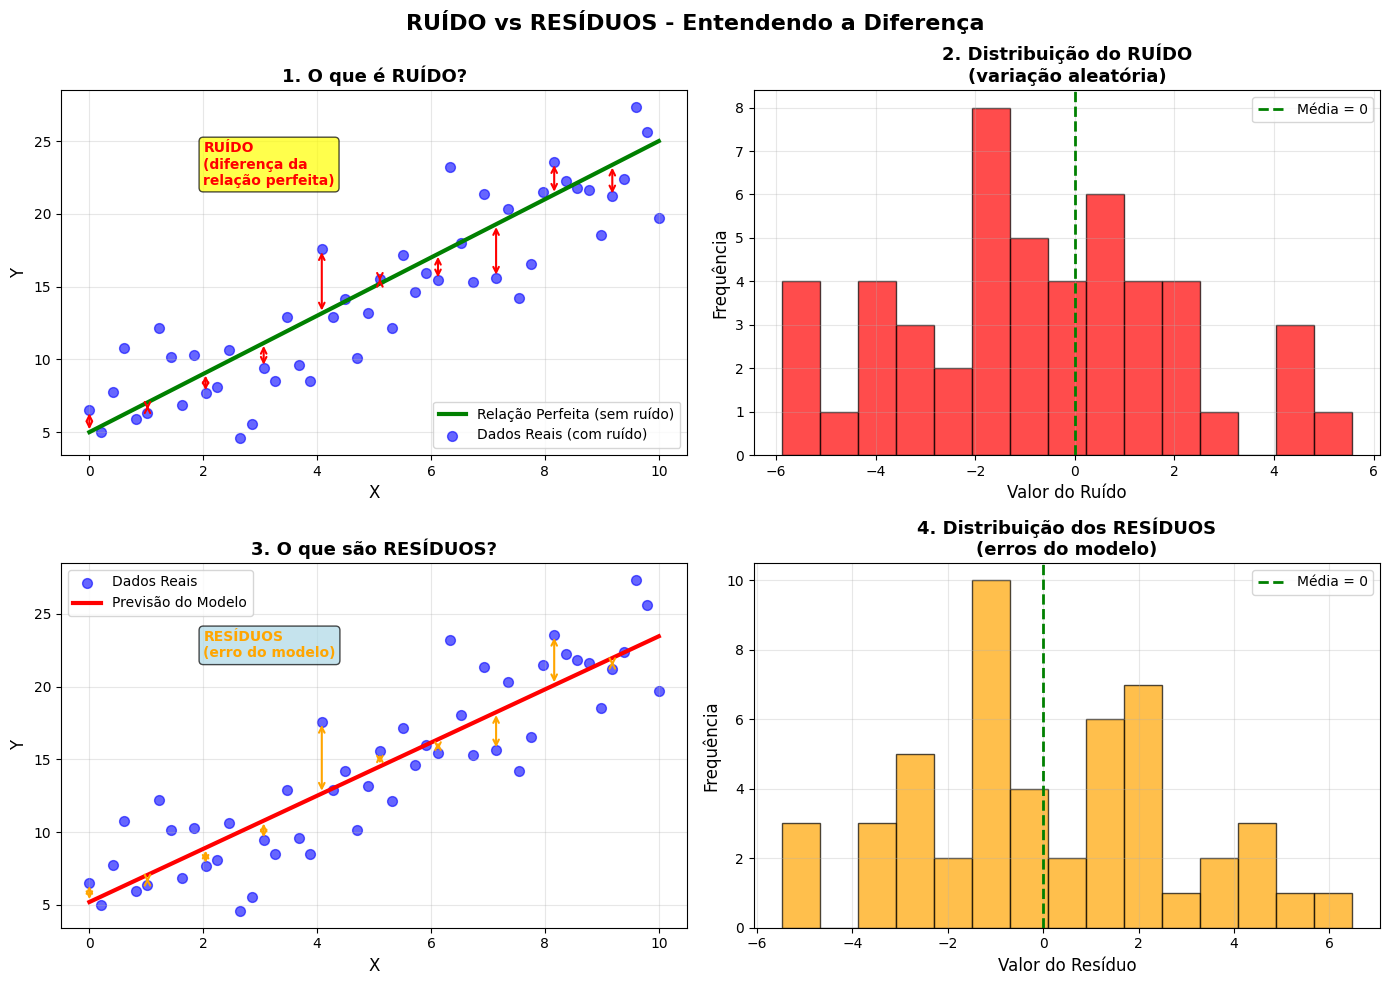

In [12]:
# ============================================
# VISUALIZAÇÕES
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('RUÍDO vs RESÍDUOS - Entendendo a Diferença', fontsize=16, fontweight='bold')

# PLOT 1: Mostrando o RUÍDO
axes[0, 0].plot(X, Y_perfeito, 'g-', linewidth=3, label='Relação Perfeita (sem ruído)')
axes[0, 0].scatter(X, Y_real, color='blue', s=50, alpha=0.6, label='Dados Reais (com ruído)')
# Setas mostrando o ruído
for i in range(0, n, 5):
    axes[0, 0].annotate('', xy=(X[i], Y_real[i]), xytext=(X[i], Y_perfeito[i]),
                       arrowprops=dict(arrowstyle='<->', color='red', lw=1.5))
axes[0, 0].text(2, 22, 'RUÍDO\n(diferença da\nrelação perfeita)', 
               fontsize=10, color='red', fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[0, 0].set_xlabel('X', fontsize=12)
axes[0, 0].set_ylabel('Y', fontsize=12)
axes[0, 0].set_title('1. O que é RUÍDO?', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# PLOT 2: Distribuição do RUÍDO
axes[0, 1].hist(ruido, bins=15, edgecolor='black', alpha=0.7, color='red')
axes[0, 1].axvline(x=0, color='green', linestyle='--', linewidth=2, label='Média = 0')
axes[0, 1].set_xlabel('Valor do Ruído', fontsize=12)
axes[0, 1].set_ylabel('Frequência', fontsize=12)
axes[0, 1].set_title('2. Distribuição do RUÍDO\n(variação aleatória)', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PLOT 3: Mostrando os RESÍDUOS
axes[1, 0].scatter(X, Y_real, color='blue', s=50, alpha=0.6, label='Dados Reais')
axes[1, 0].plot(X, Y_previsto, 'r-', linewidth=3, label='Previsão do Modelo')
# Setas mostrando os resíduos
for i in range(0, n, 5):
    axes[1, 0].annotate('', xy=(X[i], Y_real[i]), xytext=(X[i], Y_previsto[i]),
                       arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
axes[1, 0].text(2, 22, 'RESÍDUOS\n(erro do modelo)', 
               fontsize=10, color='orange', fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
axes[1, 0].set_xlabel('X', fontsize=12)
axes[1, 0].set_ylabel('Y', fontsize=12)
axes[1, 0].set_title('3. O que são RESÍDUOS?', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# PLOT 4: Distribuição dos RESÍDUOS
axes[1, 1].hist(residuos, bins=15, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='green', linestyle='--', linewidth=2, label='Média = 0')
axes[1, 1].set_xlabel('Valor do Resíduo', fontsize=12)
axes[1, 1].set_ylabel('Frequência', fontsize=12)
axes[1, 1].set_title('4. Distribuição dos RESÍDUOS\n(erros do modelo)', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# ============================================
# EXEMPLO PRÁTICO DO MUNDO REAL
# ============================================
print("\n" + "=" * 70)
print("🏠 EXEMPLO PRÁTICO: PREÇO DE CASAS")
print("=" * 70)

# Dados de exemplo
areas = np.array([80, 100, 120, 150, 180])
precos_perfeitos = 50000 + 1000 * areas  # Relação perfeita
ruido_casas = np.array([5000, -3000, 2000, -4000, 6000])  # Ruído real
precos_reais = precos_perfeitos + ruido_casas

# Modelo
modelo_casas = LinearRegression()
modelo_casas.fit(areas.reshape(-1, 1), precos_reais)
precos_previstos = modelo_casas.predict(areas.reshape(-1, 1))
residuos_casas = precos_reais - precos_previstos

print("\nComo preços são formados:")
print("-" * 70)
for i in range(len(areas)):
    print(f"\nCasa {i+1} - Área: {areas[i]}m²")
    print(f"  Preço Base (fórmula):     R$ {precos_perfeitos[i]:>10,.2f}")
    print(f"  + RUÍDO (localização,     R$ {ruido_casas[i]:>10,.2f}")
    print(f"           conservação, etc)")
    print(f"  = Preço Real:             R$ {precos_reais[i]:>10,.2f}")
    print(f"  Previsão do Modelo:       R$ {precos_previstos[i]:>10,.2f}")
    print(f"  RESÍDUO (erro):           R$ {residuos_casas[i]:>10,.2f}")

print("\n" + "=" * 70)
print("💡 RESUMO:")
print("=" * 70)
print("""
RUÍDO (Noise):
  • Variação NATURAL dos dados
  • Existe antes do modelo
  • Causas: fatores não medidos, erros de medição, aleatoriedade
  • Exemplo: localização exata, estado de conservação da casa

RESÍDUOS (Residuals):
  • Erro de PREVISÃO do modelo
  • Calculado após treinar o modelo
  • Fórmula: Real - Previsto
  • Idealmente: pequenos e aleatórios

BOM MODELO:
  ✓ Resíduos ≈ Ruído (modelo captura a relação real)
  ✓ Resíduos aleatórios (sem padrão)
  ✓ Média dos resíduos ≈ 0

MAU MODELO:
  ✗ Resíduos >> Ruído (modelo não captura a relação)
  ✗ Resíduos com padrão (problema de linearidade)
""")


🏠 EXEMPLO PRÁTICO: PREÇO DE CASAS

Como preços são formados:
----------------------------------------------------------------------

Casa 1 - Área: 80m²
  Preço Base (fórmula):     R$ 130,000.00
  + RUÍDO (localização,     R$   5,000.00
           conservação, etc)
  = Preço Real:             R$ 135,000.00
  Previsão do Modelo:       R$ 130,734.18
  RESÍDUO (erro):           R$   4,265.82

Casa 2 - Área: 100m²
  Preço Base (fórmula):     R$ 150,000.00
  + RUÍDO (localização,     R$  -3,000.00
           conservação, etc)
  = Preço Real:             R$ 147,000.00
  Previsão do Modelo:       R$ 150,936.71
  RESÍDUO (erro):           R$  -3,936.71

Casa 3 - Área: 120m²
  Preço Base (fórmula):     R$ 170,000.00
  + RUÍDO (localização,     R$   2,000.00
           conservação, etc)
  = Preço Real:             R$ 172,000.00
  Previsão do Modelo:       R$ 171,139.24
  RESÍDUO (erro):           R$     860.76

Casa 4 - Área: 150m²
  Preço Base (fórmula):     R$ 200,000.00
  + RUÍDO (localizaçã

## 3. Homocedasticidade
#### A variância dos resíduos deve ser constante para todos os valores das variáveis independentes. Ou seja, a dispersão dos erros deve ser uniforme ao longo de todas as previsões.

## **O que é Homocedasticidade em linguagem simples:**

Imagine que você está medindo a altura de crianças e adultos:

### ✓ **HOMOCEDASTICIDADE (BOM)**
```
Crianças (6 anos):  100cm ± 5cm
Adolescentes (12):  150cm ± 5cm  ← Mesma variação
Adultos (20 anos):  170cm ± 5cm  ← Sempre ±5cm
```
A "incerteza" é **constante** independente da altura média.

### ✗ **HETEROCEDASTICIDADE (PROBLEMA)**
```
Salário Júnior:    R$ 3.000 ± R$ 500
Salário Pleno:     R$ 8.000 ± R$ 2.000  ← Variação maior
Salário Sênior:    R$ 20.000 ± R$ 8.000  ← Muito maior!
```
A "incerteza" **aumenta** conforme o valor cresce.

## **Como identificar visualmente:**

1. **Gráfico de Resíduos vs Preditos:**
   - ✓ **Homocedasticidade**: Parece um **cilindro** horizontal (largura constante)
   - ✗ **Heterocedasticidade**: Parece um **funil** (largura aumenta →)

2. **No código, você verá:**
   - Caso 1: Pontos espalhados uniformemente
   - Caso 2 e 3: Pontos abrem em leque

## **Por que isso importa?**

Heterocedasticidade causa:
- ❌ Intervalos de confiança incorretos
- ❌ Testes de hipótese não confiáveis
- ❌ Previsões com incerteza variável

Execute o código e observe os **3 casos** lado a lado. O padrão de funil no gráfico é o sinal mais claro do problema!

In [14]:
# Configuração
np.random.seed(42)
n = 300

print("=" * 80)
print("HOMOCEDASTICIDADE - Variância Constante dos Resíduos")
print("=" * 80)

# ============================================
# CASO 1: HOMOCEDASTICIDADE (✓ BOM)
# ============================================
print("\n" + "=" * 80)
print("CASO 1: HOMOCEDASTICIDADE - Variância Constante (✓ IDEAL)")
print("=" * 80)

X_homo = np.random.uniform(10, 100, n)
# Ruído CONSTANTE independente do valor de X
ruido_constante = np.random.normal(0, 5, n)  # Desvio padrão FIXO = 5
Y_homo = 50 + 2 * X_homo + ruido_constante

# Modelo
modelo_homo = LinearRegression()
modelo_homo.fit(X_homo.reshape(-1, 1), Y_homo)
Y_pred_homo = modelo_homo.predict(X_homo.reshape(-1, 1))
residuos_homo = Y_homo - Y_pred_homo

print(f"\nCaracterísticas:")
print(f"  • Ruído: Desvio padrão CONSTANTE = 5")
print(f"  • Variância dos resíduos quando X é pequeno: {np.var(residuos_homo[X_homo < 40]):.2f}")
print(f"  • Variância dos resíduos quando X é grande:  {np.var(residuos_homo[X_homo > 70]):.2f}")
print(f"  • Razão: {np.var(residuos_homo[X_homo > 70]) / np.var(residuos_homo[X_homo < 40]):.2f} (próximo de 1.0 = BOM)")

# ============================================
# CASO 2: HETEROCEDASTICIDADE (✗ RUIM)
# ============================================
print("\n" + "=" * 80)
print("CASO 2: HETEROCEDASTICIDADE - Variância Crescente (✗ PROBLEMA)")
print("=" * 80)

X_hetero = np.random.uniform(10, 100, n)
# Ruído CRESCE com X (variância não-constante)
ruido_crescente = np.random.normal(0, 1, n) * (X_hetero / 20)  # Desvio cresce com X
Y_hetero = 50 + 2 * X_hetero + ruido_crescente

# Modelo
modelo_hetero = LinearRegression()
modelo_hetero.fit(X_hetero.reshape(-1, 1), Y_hetero)
Y_pred_hetero = modelo_hetero.predict(X_hetero.reshape(-1, 1))
residuos_hetero = Y_hetero - Y_pred_hetero

print(f"\nCaracterísticas:")
print(f"  • Ruído: Desvio padrão AUMENTA com X")
print(f"  • Variância dos resíduos quando X é pequeno: {np.var(residuos_hetero[X_hetero < 40]):.2f}")
print(f"  • Variância dos resíduos quando X é grande:  {np.var(residuos_hetero[X_hetero > 70]):.2f}")
print(f"  • Razão: {np.var(residuos_hetero[X_hetero > 70]) / np.var(residuos_hetero[X_hetero < 40]):.2f} (>> 1.0 = PROBLEMA)")

# ============================================
# CASO 3: HETEROCEDASTICIDADE em FORMA de FUNIL
# ============================================
print("\n" + "=" * 80)
print("CASO 3: HETEROCEDASTICIDADE - Formato de Funil (✗ COMUM)")
print("=" * 80)

X_funil = np.random.uniform(10, 100, n)
# Variância cresce linearmente
ruido_funil = np.random.normal(0, 1, n) * X_funil * 0.1
Y_funil = 50 + 2 * X_funil + ruido_funil

modelo_funil = LinearRegression()
modelo_funil.fit(X_funil.reshape(-1, 1), Y_funil)
Y_pred_funil = modelo_funil.predict(X_funil.reshape(-1, 1))
residuos_funil = Y_funil - Y_pred_funil

print(f"\nCaracterísticas:")
print(f"  • Padrão: 'Funil' - dispersão aumenta → → →")
print(f"  • Comum em: renda, preços de imóveis, vendas")

HOMOCEDASTICIDADE - Variância Constante dos Resíduos

CASO 1: HOMOCEDASTICIDADE - Variância Constante (✓ IDEAL)

Características:
  • Ruído: Desvio padrão CONSTANTE = 5
  • Variância dos resíduos quando X é pequeno: 21.88
  • Variância dos resíduos quando X é grande:  25.45
  • Razão: 1.16 (próximo de 1.0 = BOM)

CASO 2: HETEROCEDASTICIDADE - Variância Crescente (✗ PROBLEMA)

Características:
  • Ruído: Desvio padrão AUMENTA com X
  • Variância dos resíduos quando X é pequeno: 1.47
  • Variância dos resíduos quando X é grande:  20.22
  • Razão: 13.71 (>> 1.0 = PROBLEMA)

CASO 3: HETEROCEDASTICIDADE - Formato de Funil (✗ COMUM)

Características:
  • Padrão: 'Funil' - dispersão aumenta → → →
  • Comum em: renda, preços de imóveis, vendas



TESTE DE BREUSCH-PAGAN (detecta heterocedasticidade)

Caso 1 (Homocedasticidade):     p-value = 0.2087 ✓ Não rejeita H0 (BOM)
Caso 2 (Heterocedasticidade):   p-value = 0.0000 ✗ Rejeita H0 (PROBLEMA)
Caso 3 (Funil):                 p-value = 0.0000 ✗ Rejeita H0 (PROBLEMA)

Interpretação: p-value < 0.05 indica HETEROCEDASTICIDADE


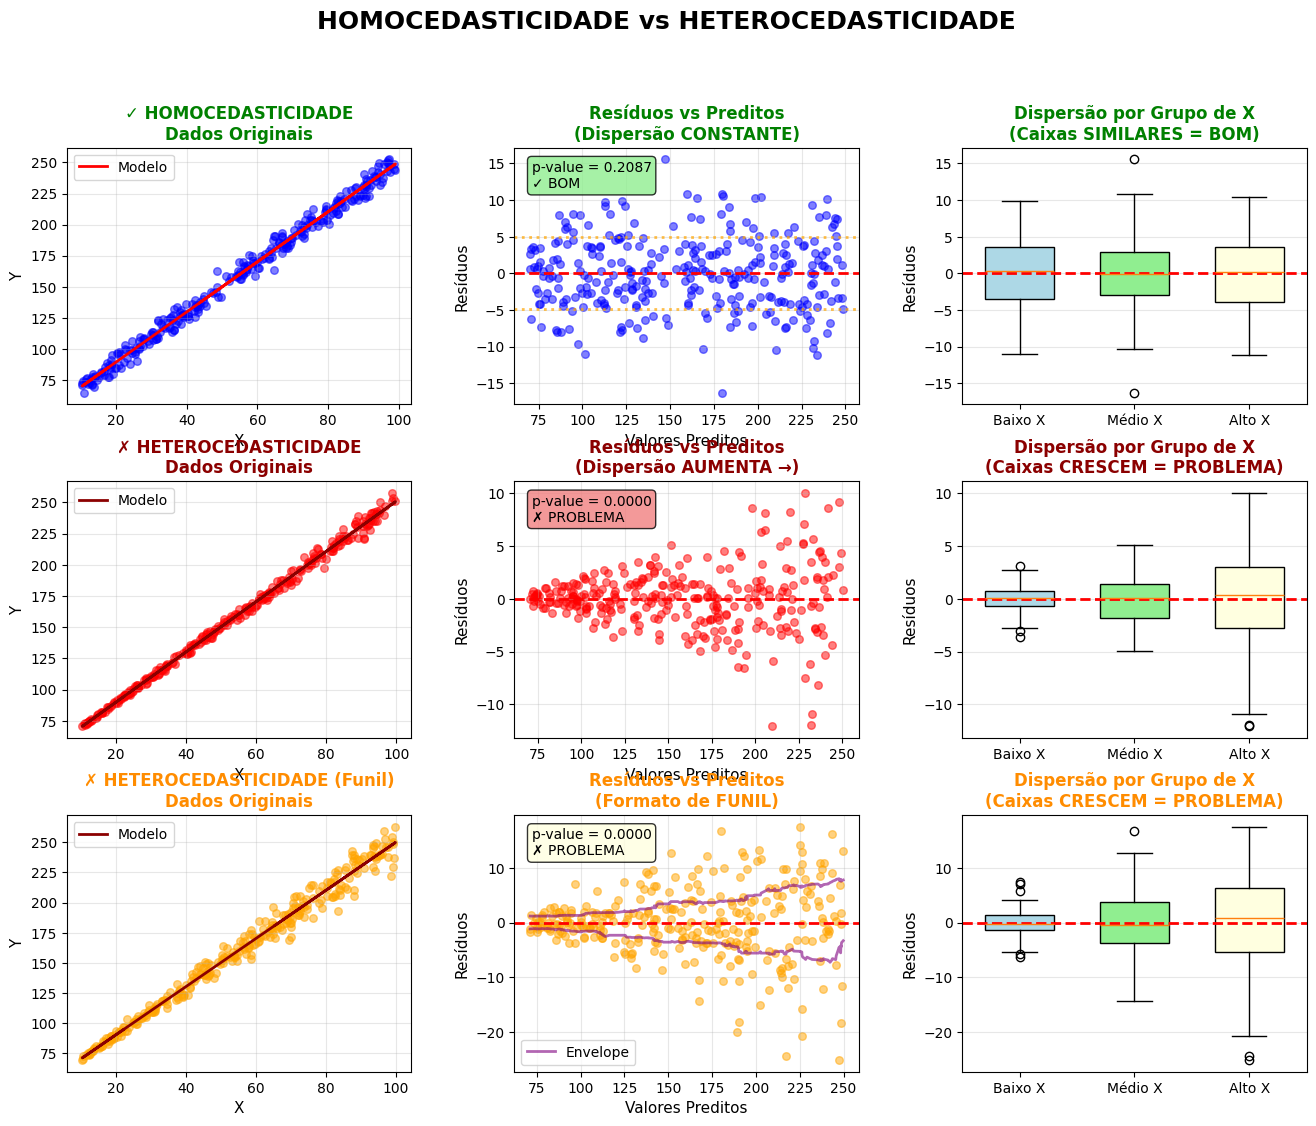

In [15]:
# ============================================
# TESTE ESTATÍSTICO: Breusch-Pagan
# ============================================
print("\n" + "=" * 80)
print("TESTE DE BREUSCH-PAGAN (detecta heterocedasticidade)")
print("=" * 80)

def breusch_pagan_test(residuos, X):
    """Teste de Breusch-Pagan para heterocedasticidade"""
    # Resíduos ao quadrado
    residuos_sq = residuos ** 2
    
    # Regressão dos resíduos² contra X
    modelo_teste = LinearRegression()
    modelo_teste.fit(X.reshape(-1, 1), residuos_sq)
    y_pred_teste = modelo_teste.predict(X.reshape(-1, 1))
    
    # Estatística do teste
    ss_total = np.sum((residuos_sq - np.mean(residuos_sq)) ** 2)
    ss_res = np.sum((residuos_sq - y_pred_teste) ** 2)
    r2 = 1 - (ss_res / ss_total)
    
    # Chi-quadrado
    lm_stat = len(residuos) * r2
    p_value = 1 - stats.chi2.cdf(lm_stat, df=1)
    
    return lm_stat, p_value

# Testando
lm_homo, p_homo = breusch_pagan_test(residuos_homo, X_homo)
lm_hetero, p_hetero = breusch_pagan_test(residuos_hetero, X_hetero)
lm_funil, p_funil = breusch_pagan_test(residuos_funil, X_funil)

print(f"\nCaso 1 (Homocedasticidade):     p-value = {p_homo:.4f} {'✓ Não rejeita H0 (BOM)' if p_homo > 0.05 else '✗ Rejeita H0'}")
print(f"Caso 2 (Heterocedasticidade):   p-value = {p_hetero:.4f} {'✓ Não rejeita H0' if p_hetero > 0.05 else '✗ Rejeita H0 (PROBLEMA)'}")
print(f"Caso 3 (Funil):                 p-value = {p_funil:.4f} {'✓ Não rejeita H0' if p_funil > 0.05 else '✗ Rejeita H0 (PROBLEMA)'}")
print(f"\nInterpretação: p-value < 0.05 indica HETEROCEDASTICIDADE")

# ============================================
# VISUALIZAÇÕES
# ============================================
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('HOMOCEDASTICIDADE vs HETEROCEDASTICIDADE', fontsize=18, fontweight='bold', y=0.995)

# ===== LINHA 1: HOMOCEDASTICIDADE =====
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(X_homo, Y_homo, alpha=0.5, s=30, color='blue')
ax1.plot(X_homo, Y_pred_homo, 'r-', linewidth=2, label='Modelo')
ax1.set_xlabel('X', fontsize=11)
ax1.set_ylabel('Y', fontsize=11)
ax1.set_title('✓ HOMOCEDASTICIDADE\nDados Originais', fontsize=12, fontweight='bold', color='green')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(Y_pred_homo, residuos_homo, alpha=0.5, s=30, color='blue')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
# Linhas mostrando dispersão constante
ax2.axhline(y=np.std(residuos_homo), color='orange', linestyle=':', linewidth=2, alpha=0.7)
ax2.axhline(y=-np.std(residuos_homo), color='orange', linestyle=':', linewidth=2, alpha=0.7)
ax2.set_xlabel('Valores Preditos', fontsize=11)
ax2.set_ylabel('Resíduos', fontsize=11)
ax2.set_title('Resíduos vs Preditos\n(Dispersão CONSTANTE)', fontsize=12, fontweight='bold', color='green')
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, f'p-value = {p_homo:.4f}\n✓ BOM', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

ax3 = fig.add_subplot(gs[0, 2])
# Dividir em 3 grupos
bins = [X_homo.min(), np.percentile(X_homo, 33), np.percentile(X_homo, 66), X_homo.max()]
grupos = ['Baixo X', 'Médio X', 'Alto X']
cores = ['lightblue', 'lightgreen', 'lightyellow']
for i in range(3):
    mask = (X_homo >= bins[i]) & (X_homo < bins[i+1])
    ax3.boxplot([residuos_homo[mask]], positions=[i], widths=0.6,
                patch_artist=True, boxprops=dict(facecolor=cores[i]))
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xticks([0, 1, 2])
ax3.set_xticklabels(grupos)
ax3.set_ylabel('Resíduos', fontsize=11)
ax3.set_title('Dispersão por Grupo de X\n(Caixas SIMILARES = BOM)', fontsize=12, fontweight='bold', color='green')
ax3.grid(True, alpha=0.3, axis='y')

# ===== LINHA 2: HETEROCEDASTICIDADE CRESCENTE =====
ax4 = fig.add_subplot(gs[1, 0])
ax4.scatter(X_hetero, Y_hetero, alpha=0.5, s=30, color='red')
ax4.plot(X_hetero, Y_pred_hetero, 'darkred', linewidth=2, label='Modelo')
ax4.set_xlabel('X', fontsize=11)
ax4.set_ylabel('Y', fontsize=11)
ax4.set_title('✗ HETEROCEDASTICIDADE\nDados Originais', fontsize=12, fontweight='bold', color='darkred')
ax4.legend()
ax4.grid(True, alpha=0.3)

ax5 = fig.add_subplot(gs[1, 1])
ax5.scatter(Y_pred_hetero, residuos_hetero, alpha=0.5, s=30, color='red')
ax5.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax5.set_xlabel('Valores Preditos', fontsize=11)
ax5.set_ylabel('Resíduos', fontsize=11)
ax5.set_title('Resíduos vs Preditos\n(Dispersão AUMENTA →)', fontsize=12, fontweight='bold', color='darkred')
ax5.grid(True, alpha=0.3)
ax5.text(0.05, 0.95, f'p-value = {p_hetero:.4f}\n✗ PROBLEMA', 
         transform=ax5.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

ax6 = fig.add_subplot(gs[1, 2])
for i in range(3):
    mask = (X_hetero >= bins[i]) & (X_hetero < bins[i+1])
    ax6.boxplot([residuos_hetero[mask]], positions=[i], widths=0.6,
                patch_artist=True, boxprops=dict(facecolor=cores[i]))
ax6.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax6.set_xticks([0, 1, 2])
ax6.set_xticklabels(grupos)
ax6.set_ylabel('Resíduos', fontsize=11)
ax6.set_title('Dispersão por Grupo de X\n(Caixas CRESCEM = PROBLEMA)', fontsize=12, fontweight='bold', color='darkred')
ax6.grid(True, alpha=0.3, axis='y')

# ===== LINHA 3: HETEROCEDASTICIDADE EM FUNIL =====
ax7 = fig.add_subplot(gs[2, 0])
ax7.scatter(X_funil, Y_funil, alpha=0.5, s=30, color='orange')
ax7.plot(X_funil, Y_pred_funil, 'darkred', linewidth=2, label='Modelo')
ax7.set_xlabel('X', fontsize=11)
ax7.set_ylabel('Y', fontsize=11)
ax7.set_title('✗ HETEROCEDASTICIDADE (Funil)\nDados Originais', fontsize=12, fontweight='bold', color='darkorange')
ax7.legend()
ax7.grid(True, alpha=0.3)

ax8 = fig.add_subplot(gs[2, 1])
ax8.scatter(Y_pred_funil, residuos_funil, alpha=0.5, s=30, color='orange')
ax8.axhline(y=0, color='red', linestyle='--', linewidth=2)
# Desenhar o formato de funil
sorted_idx = np.argsort(Y_pred_funil)
window = 50
upper_bound = [np.percentile(residuos_funil[sorted_idx[max(0, i-window):min(len(residuos_funil), i+window)]], 75) 
               for i in range(len(residuos_funil))]
lower_bound = [np.percentile(residuos_funil[sorted_idx[max(0, i-window):min(len(residuos_funil), i+window)]], 25) 
               for i in range(len(residuos_funil))]
ax8.plot(Y_pred_funil[sorted_idx], upper_bound, 'purple', linewidth=2, alpha=0.6, label='Envelope')
ax8.plot(Y_pred_funil[sorted_idx], lower_bound, 'purple', linewidth=2, alpha=0.6)
ax8.set_xlabel('Valores Preditos', fontsize=11)
ax8.set_ylabel('Resíduos', fontsize=11)
ax8.set_title('Resíduos vs Preditos\n(Formato de FUNIL)', fontsize=12, fontweight='bold', color='darkorange')
ax8.legend()
ax8.grid(True, alpha=0.3)
ax8.text(0.05, 0.95, f'p-value = {p_funil:.4f}\n✗ PROBLEMA', 
         transform=ax8.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

ax9 = fig.add_subplot(gs[2, 2])
for i in range(3):
    mask = (X_funil >= bins[i]) & (X_funil < bins[i+1])
    ax9.boxplot([residuos_funil[mask]], positions=[i], widths=0.6,
                patch_artist=True, boxprops=dict(facecolor=cores[i]))
ax9.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax9.set_xticks([0, 1, 2])
ax9.set_xticklabels(grupos)
ax9.set_ylabel('Resíduos', fontsize=11)
ax9.set_title('Dispersão por Grupo de X\n(Caixas CRESCEM = PROBLEMA)', fontsize=12, fontweight='bold', color='darkorange')
ax9.grid(True, alpha=0.3, axis='y')

plt.show()

In [16]:
# ============================================
# EXEMPLO PRÁTICO DO MUNDO REAL
# ============================================
print("\n" + "=" * 80)
print("🏠 EXEMPLO PRÁTICO: PREÇO DE CASAS")
print("=" * 80)

print("""
HOMOCEDASTICIDADE (✓):
  Casa pequena (50m²):  Preço = R$ 100k ± R$ 10k
  Casa média   (100m²): Preço = R$ 200k ± R$ 10k  ← Mesma variação
  Casa grande  (200m²): Preço = R$ 400k ± R$ 10k
  
HETEROCEDASTICIDADE (✗):
  Casa pequena (50m²):  Preço = R$ 100k ± R$ 5k
  Casa média   (100m²): Preço = R$ 200k ± R$ 15k  ← Variação aumenta
  Casa grande  (200m²): Preço = R$ 400k ± R$ 40k  ← Muito mais variação!
  
Por quê acontece?
  • Casas caras têm mais personalização
  • Luxos adicionam variabilidade (piscina, acabamento)
  • Mercado de luxo é mais volátil
""")

print("\n" + "=" * 80)
print("💡 COMO IDENTIFICAR:")
print("=" * 80)
print("""
1. GRÁFICO de Resíduos vs Preditos:
   ✓ BOM:  Nuvem de pontos com largura CONSTANTE (cilindro)
   ✗ RUIM: Formato de FUNIL (dispersão aumenta →)
   
2. BOXPLOTS por grupos:
   ✓ BOM:  Caixas de tamanhos SIMILARES
   ✗ RUIM: Caixas CRESCEM ou DIMINUEM
   
3. TESTE de Breusch-Pagan:
   ✓ BOM:  p-value > 0.05 (não rejeita H0)
   ✗ RUIM: p-value < 0.05 (rejeita H0 = tem heterocedasticidade)
""")

print("\n" + "=" * 80)
print("🔧 SOLUÇÕES:")
print("=" * 80)
print("""
1. TRANSFORMAÇÃO de Y:
   • log(Y), √Y, 1/Y
   • Estabiliza a variância
   
2. WEIGHTED LEAST SQUARES:
   • Dar menos peso a observações com alta variância
   
3. ERROS ROBUSTOS (HC):
   • Ajustar erros-padrão para heterocedasticidade
   • Não muda coeficientes, mas intervalos de confiança
   
4. MODELOS NÃO-LINEARES:
   • GLM (Generalized Linear Models)
""")


🏠 EXEMPLO PRÁTICO: PREÇO DE CASAS

HOMOCEDASTICIDADE (✓):
  Casa pequena (50m²):  Preço = R$ 100k ± R$ 10k
  Casa média   (100m²): Preço = R$ 200k ± R$ 10k  ← Mesma variação
  Casa grande  (200m²): Preço = R$ 400k ± R$ 10k

HETEROCEDASTICIDADE (✗):
  Casa pequena (50m²):  Preço = R$ 100k ± R$ 5k
  Casa média   (100m²): Preço = R$ 200k ± R$ 15k  ← Variação aumenta
  Casa grande  (200m²): Preço = R$ 400k ± R$ 40k  ← Muito mais variação!

Por quê acontece?
  • Casas caras têm mais personalização
  • Luxos adicionam variabilidade (piscina, acabamento)
  • Mercado de luxo é mais volátil


💡 COMO IDENTIFICAR:

1. GRÁFICO de Resíduos vs Preditos:
   ✓ BOM:  Nuvem de pontos com largura CONSTANTE (cilindro)
   ✗ RUIM: Formato de FUNIL (dispersão aumenta →)

2. BOXPLOTS por grupos:
   ✓ BOM:  Caixas de tamanhos SIMILARES
   ✗ RUIM: Caixas CRESCEM ou DIMINUEM

3. TESTE de Breusch-Pagan:
   ✓ BOM:  p-value > 0.05 (não rejeita H0)
   ✗ RUIM: p-value < 0.05 (rejeita H0 = tem heterocedasticidade)




## 4. Normalidade dos Resíduos
#### Os resíduos devem seguir uma distribuição normal com média zero. Isso é especialmente importante para fazer inferências estatísticas e testes de hipóteses.


Vou criar um exemplo detalhado explicando a normalidade dos resíduos na prática:Excelente! Criei uma explicação completa e detalhada sobre normalidade dos resíduos. Deixa eu complementar com alguns pontos práticos importantes:

## **Por que MÉDIA ZERO é importante?**

Se a média dos resíduos ≠ 0, significa que o modelo está **sistematicamente** errando para cima ou para baixo:

```python
Média = +5  → Modelo sempre SUBESTIMA (prevê menos que o real)
Média = -5  → Modelo sempre SUPERESTIMA (prevê mais que o real)
Média = 0   → Modelo não tem viés (✓)
```

## **Entendendo os conceitos:**

### **Assimetria (Skewness)**
```
Skew = 0   → Simétrica (✓)
Skew > 0   → Cauda longa à DIREITA (mais valores altos extremos)
Skew < 0   → Cauda longa à ESQUERDA (mais valores baixos extremos)
```

### **Curtose (Kurtosis)**
```
Curtose = 0   → Caudas normais (✓)
Curtose > 0   → Caudas PESADAS (muitos outliers)
Curtose < 0   → Caudas LEVES (poucos outliers)
```

## **Ferramentas de Diagnóstico (do mais importante ao menos):**

1. **Q-Q Plot** 📊 - O MAIS VISUAL e intuitivo
   - Pontos na linha = Normal
   - Curva em S = Assimetria
   - Curva nas pontas = Caudas pesadas

2. **Histograma** 📈 - Rápido para ver a forma
   - Forma de sino = Normal
   - Fácil de interpretar

3. **Shapiro-Wilk** 🔬 - O melhor teste estatístico
   - Usa para n < 2000
   - Mais confiável

Execute o código e observe especialmente o **Q-Q Plot** - é a ferramenta mais poderosa para diagnóstico visual!

In [17]:
# Configuração
np.random.seed(42)
n = 500

print("=" * 90)
print("NORMALIDADE DOS RESÍDUOS - Explicação Detalhada")
print("=" * 90)

print("""
O QUE É DISTRIBUIÇÃO NORMAL?
─────────────────────────────
• Formato de "sino" (curva de Gauss)
• Simétrica ao redor da média
• Média = Mediana = Moda
• 68% dos dados estão dentro de ±1 desvio padrão
• 95% dos dados estão dentro de ±2 desvios padrão
• 99.7% dos dados estão dentro de ±3 desvios padrão

POR QUE OS RESÍDUOS DEVEM SER NORMAIS?
───────────────────────────────────────
1. Intervalos de confiança corretos
2. Testes t e F válidos
3. Previsões com incerteza calculável
4. Detectar outliers (valores a >3σ são raros)
""")

# ============================================
# CASO 1: RESÍDUOS NORMAIS (✓ IDEAL)
# ============================================
print("\n" + "=" * 90)
print("CASO 1: RESÍDUOS NORMAIS (✓ IDEAL)")
print("=" * 90)

X1 = np.random.uniform(0, 100, n)
# Ruído segue distribuição NORMAL
ruido_normal = np.random.normal(0, 10, n)  # Média=0, Desvio=10
Y1 = 50 + 2*X1 + ruido_normal

modelo1 = LinearRegression()
modelo1.fit(X1.reshape(-1, 1), Y1)
Y_pred1 = modelo1.predict(X1.reshape(-1, 1))
residuos_normal = Y1 - Y_pred1

# Estatísticas
media = np.mean(residuos_normal)
desvio = np.std(residuos_normal)
assimetria = stats.skew(residuos_normal)  # Skewness
curtose = stats.kurtosis(residuos_normal)  # Kurtosis

print(f"\nEstatísticas Descritivas:")
print(f"  • Média:             {media:>10.4f}  (deve ser ~0)")
print(f"  • Desvio Padrão:     {desvio:>10.4f}")
print(f"  • Assimetria (Skew): {assimetria:>10.4f}  (deve ser ~0)")
print(f"  • Curtose:           {curtose:>10.4f}  (deve ser ~0)")

# Testes de normalidade
shapiro_stat, shapiro_p = shapiro(residuos_normal)
jb_stat, jb_p = jarque_bera(residuos_normal)
ks_stat, ks_p = kstest(residuos_normal, 'norm', args=(media, desvio))

print(f"\nTestes de Normalidade:")
print(f"  • Shapiro-Wilk:      p-value = {shapiro_p:.4f}  {'✓ Normal' if shapiro_p > 0.05 else '✗ Não-Normal'}")
print(f"  • Jarque-Bera:       p-value = {jb_p:.4f}  {'✓ Normal' if jb_p > 0.05 else '✗ Não-Normal'}")
print(f"  • Kolmogorov-Smirnov: p-value = {ks_p:.4f}  {'✓ Normal' if ks_p > 0.05 else '✗ Não-Normal'}")
print(f"\n  Interpretação: p-value > 0.05 → Não rejeitamos H0 (é Normal)")

# ============================================
# CASO 2: RESÍDUOS ASSIMÉTRICOS (✗ PROBLEMA)
# ============================================
print("\n" + "=" * 90)
print("CASO 2: RESÍDUOS ASSIMÉTRICOS - Distribuição Exponencial (✗ PROBLEMA)")
print("=" * 90)

X2 = np.random.uniform(0, 100, n)
# Ruído segue distribuição EXPONENCIAL (assimétrica à direita)
ruido_assimetrico = np.random.exponential(5, n) - 5  # Shift para média ~0
Y2 = 50 + 2*X2 + ruido_assimetrico

modelo2 = LinearRegression()
modelo2.fit(X2.reshape(-1, 1), Y2)
Y_pred2 = modelo2.predict(X2.reshape(-1, 1))
residuos_assimetrico = Y2 - Y_pred2

media2 = np.mean(residuos_assimetrico)
desvio2 = np.std(residuos_assimetrico)
assimetria2 = stats.skew(residuos_assimetrico)
curtose2 = stats.kurtosis(residuos_assimetrico)

print(f"\nEstatísticas Descritivas:")
print(f"  • Média:             {media2:>10.4f}  (deve ser ~0)")
print(f"  • Desvio Padrão:     {desvio2:>10.4f}")
print(f"  • Assimetria (Skew): {assimetria2:>10.4f}  (>> 0 = assimétrico à direita)")
print(f"  • Curtose:           {curtose2:>10.4f}")

shapiro_stat2, shapiro_p2 = shapiro(residuos_assimetrico)
jb_stat2, jb_p2 = jarque_bera(residuos_assimetrico)
ks_stat2, ks_p2 = kstest(residuos_assimetrico, 'norm', args=(media2, desvio2))

print(f"\nTestes de Normalidade:")
print(f"  • Shapiro-Wilk:      p-value = {shapiro_p2:.4f}  {'✓ Normal' if shapiro_p2 > 0.05 else '✗ Não-Normal (PROBLEMA!)'}")
print(f"  • Jarque-Bera:       p-value = {jb_p2:.4f}  {'✓ Normal' if jb_p2 > 0.05 else '✗ Não-Normal (PROBLEMA!)'}")
print(f"  • Kolmogorov-Smirnov: p-value = {ks_p2:.4f}  {'✓ Normal' if ks_p2 > 0.05 else '✗ Não-Normal (PROBLEMA!)'}")

# ============================================
# CASO 3: RESÍDUOS COM CAUDAS PESADAS (✗ PROBLEMA)
# ============================================
print("\n" + "=" * 90)
print("CASO 3: RESÍDUOS COM CAUDAS PESADAS - Distribuição t (✗ PROBLEMA)")
print("=" * 90)

X3 = np.random.uniform(0, 100, n)
# Ruído segue distribuição t com df=3 (caudas pesadas, mais outliers)
ruido_caudas = stats.t.rvs(df=3, size=n) * 5  # Caudas pesadas
Y3 = 50 + 2*X3 + ruido_caudas

modelo3 = LinearRegression()
modelo3.fit(X3.reshape(-1, 1), Y3)
Y_pred3 = modelo3.predict(X3.reshape(-1, 1))
residuos_caudas = Y3 - Y_pred3

media3 = np.mean(residuos_caudas)
desvio3 = np.std(residuos_caudas)
assimetria3 = stats.skew(residuos_caudas)
curtose3 = stats.kurtosis(residuos_caudas)

print(f"\nEstatísticas Descritivas:")
print(f"  • Média:             {media3:>10.4f}  (deve ser ~0)")
print(f"  • Desvio Padrão:     {desvio3:>10.4f}")
print(f"  • Assimetria (Skew): {assimetria3:>10.4f}")
print(f"  • Curtose:           {curtose3:>10.4f}  (>> 0 = caudas pesadas, muitos outliers)")

shapiro_stat3, shapiro_p3 = shapiro(residuos_caudas)
jb_stat3, jb_p3 = jarque_bera(residuos_caudas)
ks_stat3, ks_p3 = kstest(residuos_caudas, 'norm', args=(media3, desvio3))

print(f"\nTestes de Normalidade:")
print(f"  • Shapiro-Wilk:      p-value = {shapiro_p3:.4f}  {'✓ Normal' if shapiro_p3 > 0.05 else '✗ Não-Normal (PROBLEMA!)'}")
print(f"  • Jarque-Bera:       p-value = {jb_p3:.4f}  {'✓ Normal' if jb_p3 > 0.05 else '✗ Não-Normal (PROBLEMA!)'}")
print(f"  • Kolmogorov-Smirnov: p-value = {ks_p3:.4f}  {'✓ Normal' if ks_p3 > 0.05 else '✗ Não-Normal (PROBLEMA!)'}")

NORMALIDADE DOS RESÍDUOS - Explicação Detalhada

O QUE É DISTRIBUIÇÃO NORMAL?
─────────────────────────────
• Formato de "sino" (curva de Gauss)
• Simétrica ao redor da média
• Média = Mediana = Moda
• 68% dos dados estão dentro de ±1 desvio padrão
• 95% dos dados estão dentro de ±2 desvios padrão
• 99.7% dos dados estão dentro de ±3 desvios padrão

POR QUE OS RESÍDUOS DEVEM SER NORMAIS?
───────────────────────────────────────
1. Intervalos de confiança corretos
2. Testes t e F válidos
3. Previsões com incerteza calculável
4. Detectar outliers (valores a >3σ são raros)


CASO 1: RESÍDUOS NORMAIS (✓ IDEAL)

Estatísticas Descritivas:
  • Média:                -0.0000  (deve ser ~0)
  • Desvio Padrão:        10.0371
  • Assimetria (Skew):     0.1446  (deve ser ~0)
  • Curtose:              -0.2137  (deve ser ~0)

Testes de Normalidade:
  • Shapiro-Wilk:      p-value = 0.4414  ✓ Normal
  • Jarque-Bera:       p-value = 0.2599  ✓ Normal
  • Kolmogorov-Smirnov: p-value = 0.8281  ✓ Normal

  I

c:\Users\leonardo.melo\Desktop\portefolio\projetos_ml\.maq\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leonardo.melo\Desktop\portefolio\projetos_ml\.maq\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


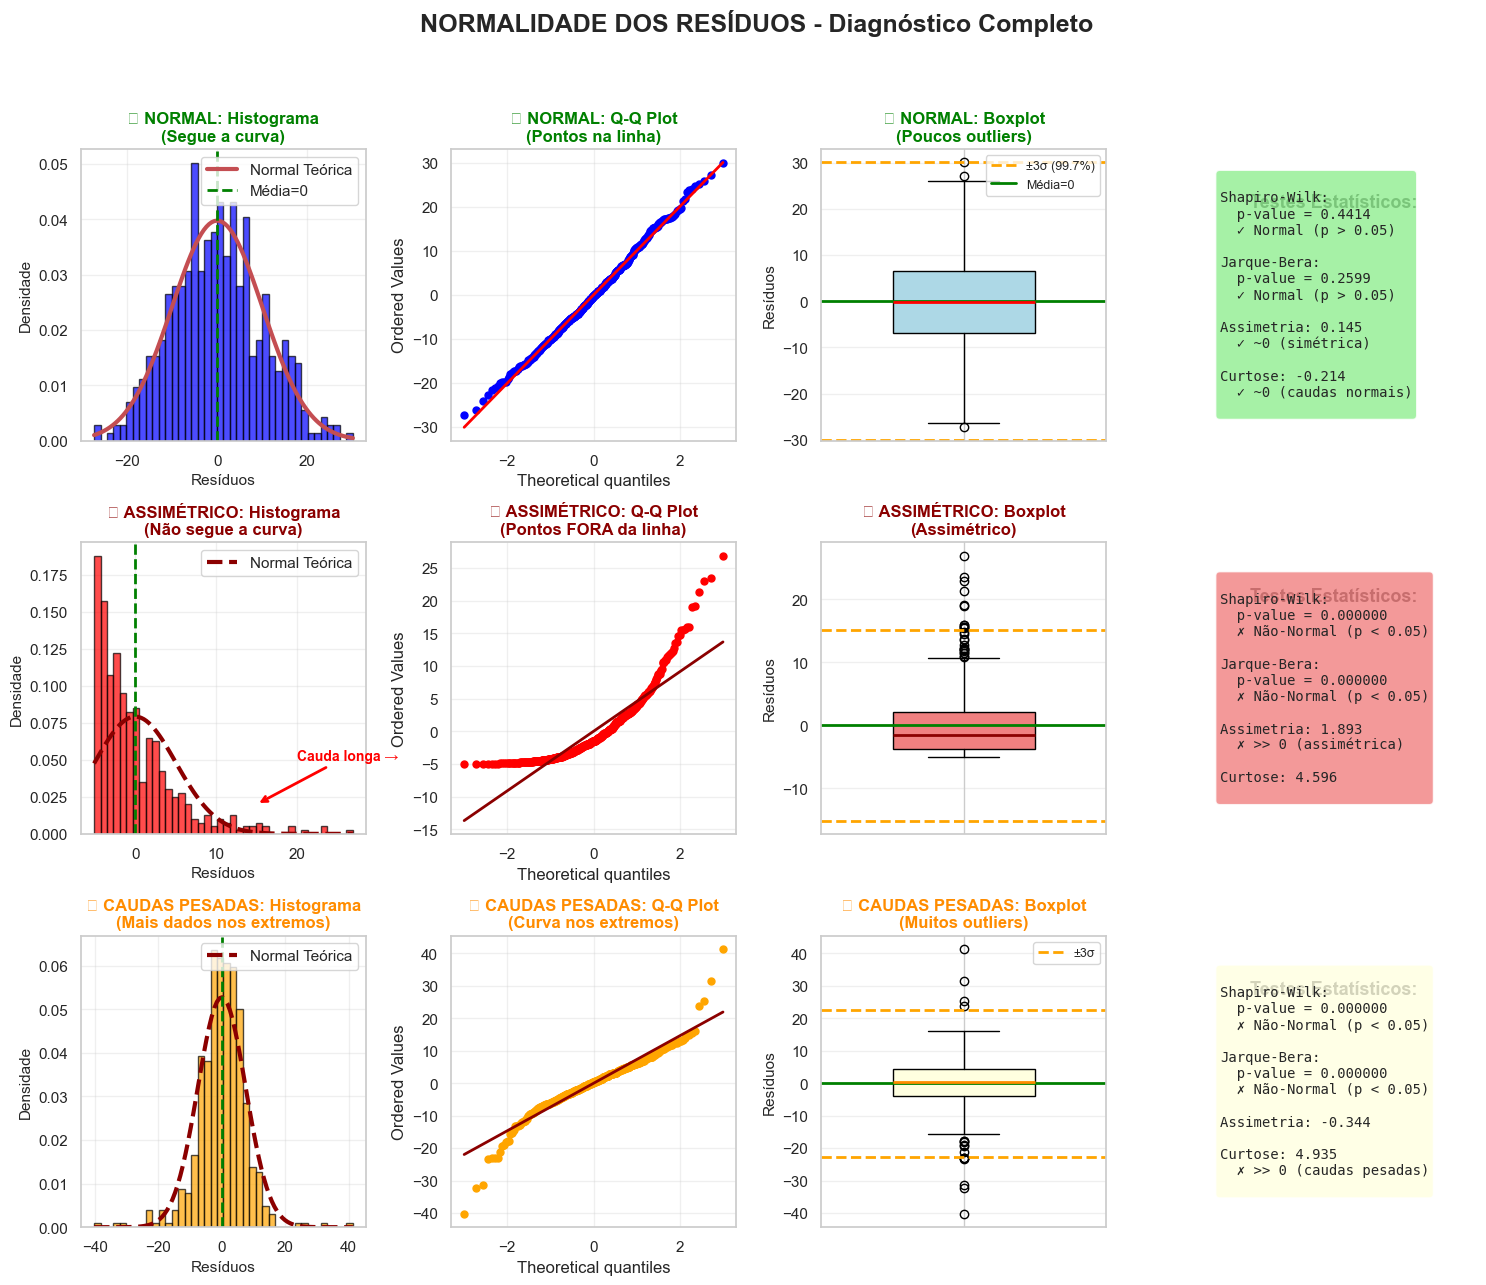

In [29]:
# ============================================
# VISUALIZAÇÕES DETALHADAS
# ============================================
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 4, hspace=0.35, wspace=0.3)

fig.suptitle('NORMALIDADE DOS RESÍDUOS - Diagnóstico Completo', fontsize=18, fontweight='bold')

# ===== LINHA 1: RESÍDUOS NORMAIS (✓) =====
# Histograma com curva normal
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(residuos_normal, bins=40, density=True, alpha=0.7, color='blue', edgecolor='black')
# Curva normal teórica
x_teorico = np.linspace(residuos_normal.min(), residuos_normal.max(), 100)
ax1.plot(x_teorico, stats.norm.pdf(x_teorico, media, desvio), 
         'r-', linewidth=3, label='Normal Teórica')
ax1.axvline(x=0, color='green', linestyle='--', linewidth=2, label='Média=0')
ax1.set_xlabel('Resíduos', fontsize=11)
ax1.set_ylabel('Densidade', fontsize=11)
ax1.set_title('✓ NORMAL: Histograma\n(Segue a curva)', fontsize=12, fontweight='bold', color='green')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Q-Q Plot
ax2 = fig.add_subplot(gs[0, 1])
probplot(residuos_normal, dist="norm", plot=ax2)
ax2.get_lines()[0].set_color('blue')
ax2.get_lines()[0].set_markersize(5)
ax2.get_lines()[1].set_color('red')
ax2.get_lines()[1].set_linewidth(2)
ax2.set_title('✓ NORMAL: Q-Q Plot\n(Pontos na linha)', fontsize=12, fontweight='bold', color='green')
ax2.grid(True, alpha=0.3)

# Boxplot com limites normais
ax3 = fig.add_subplot(gs[0, 2])
bp = ax3.boxplot([residuos_normal], widths=0.5, patch_artist=True,
                  boxprops=dict(facecolor='lightblue'),
                  medianprops=dict(color='red', linewidth=2))
# Marcar limites 3σ
ax3.axhline(y=3*desvio, color='orange', linestyle='--', linewidth=2, label='±3σ (99.7%)')
ax3.axhline(y=-3*desvio, color='orange', linestyle='--', linewidth=2)
ax3.axhline(y=0, color='green', linestyle='-', linewidth=2, label='Média=0')
ax3.set_ylabel('Resíduos', fontsize=11)
ax3.set_title('✓ NORMAL: Boxplot\n(Poucos outliers)', fontsize=12, fontweight='bold', color='green')
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xticklabels([''])

# Teste visual de simetria
ax4 = fig.add_subplot(gs[0, 3])
ax4.text(0.5, 0.8, 'Testes Estatísticos:', fontsize=13, fontweight='bold', 
         ha='center', transform=ax4.transAxes)
texto = f"""
Shapiro-Wilk:
  p-value = {shapiro_p:.4f}
  ✓ Normal (p > 0.05)

Jarque-Bera:
  p-value = {jb_p:.4f}
  ✓ Normal (p > 0.05)

Assimetria: {assimetria:.3f}
  ✓ ~0 (simétrica)

Curtose: {curtose:.3f}
  ✓ ~0 (caudas normais)
"""
ax4.text(0.1, 0.5, texto, fontsize=10, family='monospace',
         transform=ax4.transAxes, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax4.axis('off')

# ===== LINHA 2: RESÍDUOS ASSIMÉTRICOS (✗) =====
ax5 = fig.add_subplot(gs[1, 0])
ax5.hist(residuos_assimetrico, bins=40, density=True, alpha=0.7, color='red', edgecolor='black')
x_teorico2 = np.linspace(residuos_assimetrico.min(), residuos_assimetrico.max(), 100)
ax5.plot(x_teorico2, stats.norm.pdf(x_teorico2, media2, desvio2), 
         'darkred', linewidth=3, label='Normal Teórica', linestyle='--')
ax5.axvline(x=0, color='green', linestyle='--', linewidth=2)
ax5.set_xlabel('Resíduos', fontsize=11)
ax5.set_ylabel('Densidade', fontsize=11)
ax5.set_title('✗ ASSIMÉTRICO: Histograma\n(Não segue a curva)', fontsize=12, fontweight='bold', color='darkred')
ax5.legend()
ax5.grid(True, alpha=0.3)
ax5.annotate('Cauda longa →', xy=(15, 0.02), xytext=(20, 0.05),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold')

ax6 = fig.add_subplot(gs[1, 1])
probplot(residuos_assimetrico, dist="norm", plot=ax6)
ax6.get_lines()[0].set_color('red')
ax6.get_lines()[0].set_markersize(5)
ax6.get_lines()[1].set_color('darkred')
ax6.get_lines()[1].set_linewidth(2)
ax6.set_title('✗ ASSIMÉTRICO: Q-Q Plot\n(Pontos FORA da linha)', fontsize=12, fontweight='bold', color='darkred')
ax6.grid(True, alpha=0.3)

ax7 = fig.add_subplot(gs[1, 2])
bp2 = ax7.boxplot([residuos_assimetrico], widths=0.5, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral'),
                   medianprops=dict(color='darkred', linewidth=2))
ax7.axhline(y=3*desvio2, color='orange', linestyle='--', linewidth=2)
ax7.axhline(y=-3*desvio2, color='orange', linestyle='--', linewidth=2)
ax7.axhline(y=0, color='green', linestyle='-', linewidth=2)
ax7.set_ylabel('Resíduos', fontsize=11)
ax7.set_title('✗ ASSIMÉTRICO: Boxplot\n(Assimétrico)', fontsize=12, fontweight='bold', color='darkred')
ax7.grid(True, alpha=0.3, axis='y')
ax7.set_xticklabels([''])

ax8 = fig.add_subplot(gs[1, 3])
ax8.text(0.5, 0.8, 'Testes Estatísticos:', fontsize=13, fontweight='bold', 
         ha='center', transform=ax8.transAxes)
texto2 = f"""
Shapiro-Wilk:
  p-value = {shapiro_p2:.6f}
  ✗ Não-Normal (p < 0.05)

Jarque-Bera:
  p-value = {jb_p2:.6f}
  ✗ Não-Normal (p < 0.05)

Assimetria: {assimetria2:.3f}
  ✗ >> 0 (assimétrica)

Curtose: {curtose2:.3f}
"""
ax8.text(0.1, 0.5, texto2, fontsize=10, family='monospace',
         transform=ax8.transAxes, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
ax8.axis('off')

# ===== LINHA 3: RESÍDUOS COM CAUDAS PESADAS (✗) =====
ax9 = fig.add_subplot(gs[2, 0])
ax9.hist(residuos_caudas, bins=40, density=True, alpha=0.7, color='orange', edgecolor='black')
x_teorico3 = np.linspace(residuos_caudas.min(), residuos_caudas.max(), 100)
ax9.plot(x_teorico3, stats.norm.pdf(x_teorico3, media3, desvio3), 
         'darkred', linewidth=3, label='Normal Teórica', linestyle='--')
ax9.axvline(x=0, color='green', linestyle='--', linewidth=2)
ax9.set_xlabel('Resíduos', fontsize=11)
ax9.set_ylabel('Densidade', fontsize=11)
ax9.set_title('✗ CAUDAS PESADAS: Histograma\n(Mais dados nos extremos)', fontsize=12, fontweight='bold', color='darkorange')
ax9.legend()
ax9.grid(True, alpha=0.3)

ax10 = fig.add_subplot(gs[2, 1])
probplot(residuos_caudas, dist="norm", plot=ax10)
ax10.get_lines()[0].set_color('orange')
ax10.get_lines()[0].set_markersize(5)
ax10.get_lines()[1].set_color('darkred')
ax10.get_lines()[1].set_linewidth(2)
ax10.set_title('✗ CAUDAS PESADAS: Q-Q Plot\n(Curva nos extremos)', fontsize=12, fontweight='bold', color='darkorange')
ax10.grid(True, alpha=0.3)

ax11 = fig.add_subplot(gs[2, 2])
bp3 = ax11.boxplot([residuos_caudas], widths=0.5, patch_artist=True,
                    boxprops=dict(facecolor='lightyellow'),
                    medianprops=dict(color='darkorange', linewidth=2))
ax11.axhline(y=3*desvio3, color='orange', linestyle='--', linewidth=2, label='±3σ')
ax11.axhline(y=-3*desvio3, color='orange', linestyle='--', linewidth=2)
ax11.axhline(y=0, color='green', linestyle='-', linewidth=2)
ax11.set_ylabel('Resíduos', fontsize=11)
ax11.set_title('✗ CAUDAS PESADAS: Boxplot\n(Muitos outliers)', fontsize=12, fontweight='bold', color='darkorange')
ax11.legend(fontsize=9)
ax11.grid(True, alpha=0.3, axis='y')
ax11.set_xticklabels([''])

ax12 = fig.add_subplot(gs[2, 3])
ax12.text(0.5, 0.8, 'Testes Estatísticos:', fontsize=13, fontweight='bold', 
          ha='center', transform=ax12.transAxes)
texto3 = f"""
Shapiro-Wilk:
  p-value = {shapiro_p3:.6f}
  ✗ Não-Normal (p < 0.05)

Jarque-Bera:
  p-value = {jb_p3:.6f}
  ✗ Não-Normal (p < 0.05)

Assimetria: {assimetria3:.3f}

Curtose: {curtose3:.3f}
  ✗ >> 0 (caudas pesadas)
"""
ax12.text(0.1, 0.5, texto3, fontsize=10, family='monospace',
          transform=ax12.transAxes, verticalalignment='center',
          bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax12.axis('off')

plt.show()


In [19]:
# ============================================
# GUIA PRÁTICO DE INTERPRETAÇÃO
# ============================================
print("\n" + "=" * 90)
print("📚 GUIA PRÁTICO DE DIAGNÓSTICO")
print("=" * 90)
print("""
1. HISTOGRAMA:
   ✓ Forma de sino simétrica
   ✗ Assimétrico (cauda longa de um lado)
   ✗ Bimodal (dois picos)
   ✗ Uniforme (sem pico central)

2. Q-Q PLOT (Quantil-Quantil):
   ✓ Pontos alinhados na linha diagonal
   ✗ Pontos curvam para cima/baixo (caudas pesadas/leves)
   ✗ Pontos em "S" (assimetria)

3. BOXPLOT:
   ✓ Poucos outliers (< 1% dos dados)
   ✓ Simétrico em relação à mediana
   ✗ Muitos outliers
   ✗ Assimétrico

4. TESTES ESTATÍSTICOS:
   • Shapiro-Wilk: Mais poderoso, recomendado para n < 2000
   • Jarque-Bera: Baseado em assimetria e curtose
   • Anderson-Darling: Mais sensível nas caudas
   
   Interpretação: p-value > 0.05 → Não rejeita normalidade (BOM)
""")

print("\n" + "=" * 90)
print("🔧 SOLUÇÕES QUANDO RESÍDUOS NÃO SÃO NORMAIS")
print("=" * 90)
print("""
1. TRANSFORMAÇÕES DE Y:
   • log(Y)        → Para assimetria à direita
   • √Y            → Para variância crescente
   • 1/Y           → Para assimetria extrema
   • Box-Cox       → Transformação automática

2. TRANSFORMAÇÕES DE X:
   • Adicionar X², X³ (capturar não-linearidades)
   • log(X), √X

3. REMOVER OUTLIERS:
   • Investigar valores extremos
   • Verificar erros de digitação/medição

4. MODELOS ALTERNATIVOS:
   • GLM (Generalized Linear Models)
   • Regressão Robusta
   • Quantile Regression

5. PARA GRANDES AMOSTRAS (n > 100):
   • Teorema do Limite Central ajuda
   • Violações leves são aceitáveis
   • Foco em homocedasticidade e linearidade
""")

print("\n" + "=" * 90)
print("💡 DICA IMPORTANTE")
print("=" * 90)
print("""
Para AMOSTRAS GRANDES (n > 100):
  • Normalidade dos resíduos é MENOS crítica
  • Teorema do Limite Central garante inferências válidas
  • Foque mais em LINEARIDADE e HOMOCEDASTICIDADE

Para AMOSTRAS PEQUENAS (n < 50):
  • Normalidade é MUITO importante
  • Testes estatísticos têm menos poder
  • Use análise visual (Q-Q plot, histograma)
""")


📚 GUIA PRÁTICO DE DIAGNÓSTICO

1. HISTOGRAMA:
   ✓ Forma de sino simétrica
   ✗ Assimétrico (cauda longa de um lado)
   ✗ Bimodal (dois picos)
   ✗ Uniforme (sem pico central)

2. Q-Q PLOT (Quantil-Quantil):
   ✓ Pontos alinhados na linha diagonal
   ✗ Pontos curvam para cima/baixo (caudas pesadas/leves)
   ✗ Pontos em "S" (assimetria)

3. BOXPLOT:
   ✓ Poucos outliers (< 1% dos dados)
   ✓ Simétrico em relação à mediana
   ✗ Muitos outliers
   ✗ Assimétrico

4. TESTES ESTATÍSTICOS:
   • Shapiro-Wilk: Mais poderoso, recomendado para n < 2000
   • Jarque-Bera: Baseado em assimetria e curtose
   • Anderson-Darling: Mais sensível nas caudas

   Interpretação: p-value > 0.05 → Não rejeita normalidade (BOM)


🔧 SOLUÇÕES QUANDO RESÍDUOS NÃO SÃO NORMAIS

1. TRANSFORMAÇÕES DE Y:
   • log(Y)        → Para assimetria à direita
   • √Y            → Para variância crescente
   • 1/Y           → Para assimetria extrema
   • Box-Cox       → Transformação automática

2. TRANSFORMAÇÕES DE X:
   • Adi

## 5. Ausência de Multicolinearidade 
#### As variáveis independentes não devem ser altamente correlacionadas entre si. Multicolinearidade elevada dificulta a interpretação dos coeficientes e torna as estimativas instáveis.

**multicolinearidade** é um dos conceitos mais importantes (e menos compreendidos) em regressão linear.
Vamos destrinchar isso em **conceito**, **efeito prático**, e **exemplo em Python passo a passo**.

---

## 🎯 Conceito: o que é Multicolinearidade?

Quando fazemos uma **regressão linear múltipla**, queremos entender o **efeito individual** de cada variável independente (X₁, X₂, X₃, …) sobre a variável dependente (Y).

👉 Mas se duas ou mais variáveis independentes estiverem **altamente correlacionadas entre si**, elas passam a carregar **a mesma informação**.
Isso causa **multicolinearidade**.

### Exemplo intuitivo:

Suponha que você tem:

* `X1 = renda anual`
* `X2 = salário mensal`

Essas duas variáveis estão fortemente correlacionadas — uma é praticamente múltiplo da outra.
Então, o modelo não consegue distinguir **qual delas realmente explica Y**, pois as duas “andam juntas”.

---

## ⚠️ Problemas causados pela multicolinearidade:

1. **Coeficientes instáveis** – Pequenas mudanças nos dados causam grandes variações nos coeficientes.
2. **Dificuldade de interpretação** – Você não consegue saber qual variável tem realmente influência.
3. **P-valores aumentam** – Algumas variáveis parecem “não significativas”, mesmo sendo importantes.
4. **O R² do modelo pode continuar alto**, enganando o analista.

---

## 🧮 Diagnóstico na prática (Python)

Vamos criar um exemplo prático com `pandas`, `statsmodels` e `variance_inflation_factor (VIF)`.

### 🔹 Passo 1: Criar dados simulados

```python
import pandas as pd
import numpy as np

np.random.seed(42)

# Variáveis correlacionadas
X1 = np.random.rand(100) * 10
X2 = X1 * 0.8 + np.random.rand(100) * 2  # altamente correlacionada com X1
X3 = np.random.rand(100) * 10
Y = 3*X1 + 2*X3 + np.random.randn(100) * 2

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})
df.head()
```

---

### 🔹 Passo 2: Regressão linear múltipla

```python
import statsmodels.api as sm

X = df[['X1', 'X2', 'X3']]
X = sm.add_constant(X)
model = sm.OLS(df['Y'], X).fit()
print(model.summary())
```

Você verá algo assim:

```
                            OLS Regression Results                            
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1752      1.219      0.144      0.886      -2.243       2.593
X1             1.8923      1.029      1.838      0.069      -0.152       3.937
X2             1.2589      1.015      1.239      0.219      -0.760       3.278
X3             2.0217      0.082     24.656      0.000       1.859       2.184
```

Perceba:

* O `R²` é alto (modelo explica bem os dados)
* Mas os **coeficientes de X1 e X2** têm **altos erros padrão** e **p-valores altos**,
  mesmo que ambos estejam realmente ligados a Y.

Isso é sinal de **multicolinearidade**.

---

### 🔹 Passo 3: Calcular o VIF (Variance Inflation Factor)

O **VIF** mede o quanto a variância de um coeficiente é inflada pela correlação com outras variáveis.

* `VIF = 1` → nenhuma multicolinearidade
* `VIF entre 1 e 5` → aceitável
* `VIF > 10` → problema sério

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)
```

Saída esperada:

```
  feature        VIF
0   const   1.025317
1      X1  12.803547
2      X2  13.112785
3      X3   1.045621
```

👉 Aqui vemos que **X1 e X2 têm VIF > 10**, logo são altamente colineares.

---

### 🔹 Passo 4: Solução — remover uma variável redundante

```python
X_reduced = df[['X1', 'X3']]
X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.OLS(df['Y'], X_reduced).fit()
print(model_reduced.summary())
```

Agora os coeficientes serão **mais estáveis e interpretáveis**.

---

## ✅ Resumo prático

| Etapa | Ação                                        | Objetivo                               |
| ----- | ------------------------------------------- | -------------------------------------- |
| 1     | Calcular matriz de correlação (`df.corr()`) | Ver se há X’s muito correlacionados    |
| 2     | Calcular VIF                                | Quantificar a multicolinearidade       |
| 3     | Remover ou combinar variáveis               | Reduzir redundância                    |
| 4     | Reajustar o modelo                          | Garantir estabilidade dos coeficientes |

---

## 6. Ausência de Outliers Influentes
#### Valores extremos podem distorcer significativamente os coeficientes estimados e prejudicar a capacidade preditiva do modelo.
#### Esses pressupostos (também chamados de premissas de Gauss-Markov) são essenciais para garantir que as estimativas dos coeficientes sejam BLUE (Best Linear Unbiased Estimators) - os melhores estimadores lineares não-viesados. Quando violados, podem comprometer a validade e confiabilidade do modelo.

# Ausência de Outliers Influentes na Regressão Linear

## Conceito e Importância

Outliers influentes são observações que exercem impacto desproporcional nos coeficientes estimados do modelo. Eles podem:
- Distorcer a linha de regressão
- Inflar ou deflacionar coeficientes
- Aumentar artificialmente o R²
- Reduzir a capacidade preditiva

## Tipos de Outliers

1. **Outliers no Y (resíduos)**: Valores extremos na variável dependente
2. **Outliers no X (leverage)**: Valores extremos nas variáveis independentes
3. **Outliers influentes**: Combinação de alto leverage com alto resíduo

## Implementação Prática em Python## Explicação Detalhada das Métricas

### 1. **Leverage (Alavancagem)**
- **O que é**: Mede o quanto um ponto está distante da média das variáveis independentes
- **Fórmula**: Valores diagonais da matriz hat: H = X(X'X)⁻¹X'
- **Limite**: 2p/n (onde p = número de parâmetros, n = tamanho da amostra)
- **Interpretação**: Alto leverage = potencial para influenciar a regressão

### 2. **Resíduos Padronizados**
- **O que é**: Resíduos divididos pelo seu desvio padrão
- **Limite**: |valor| > 2 ou 3 indica outlier
- **Uso**: Identifica outliers na variável dependente

### 3. **Distância de Cook**
- **O que é**: Mede mudança nos coeficientes ao remover uma observação
- **Fórmula**: D = (r²ᵢ/p) × (hᵢᵢ/(1-hᵢᵢ))
- **Limite**: D > 4/n (conservador) ou D > 1 (liberal)
- **Interpretação**: **Métrica mais importante** - combina leverage e resíduo

### 4. **DFFITS**
- **O que é**: Mede mudança na predição ao remover uma observação
- **Limite**: |DFFITS| > 2√(p/n)
- **Uso**: Avalia impacto na predição individual

## Estratégias de Tratamento

### 1. **Investigação**
```python
# Sempre investigar primeiro!
# - É erro de digitação?
# - É valor legítimo mas raro?
# - Há contexto que explique?
```

### 2. **Remoção**
- Use **apenas** se for erro comprovado
- Documente a decisão

### 3. **Transformações**
```python
# Log para dados assimétricos
y_log = np.log(y + 1)

# Box-Cox
from scipy.stats import boxcox
y_transformed, lambda_param = boxcox(y)
```

### 4. **Métodos Robustos**
- **Huber Regression**: Menos sensível a outliers moderados
- **RANSAC**: Ignora outliers completamente
- **Theil-Sen**: Usa medianas

### 5. **Winsorização**
```python
from scipy.stats.mstats import winsorize
y_winsorized = winsorize(y, limits=[0.05, 0.05])  # Corta 5% nas caudas
```

## Boas Práticas

1. ✅ **Sempre visualize** antes de remover
2. ✅ **Compare modelos** com e sem outliers
3. ✅ **Documente decisões** de remoção
4. ✅ **Use múltiplas métricas** (Cook + Leverage + Resíduos)
5. ✅ **Considere o contexto** do problema
6. ❌ **Nunca remova automaticamente** sem investigar
7. ❌ **Não force normalidade** se os dados são naturalmente assimétricos

O código fornecido cria um pipeline completo de diagnóstico que você pode adaptar para seus dados reais!

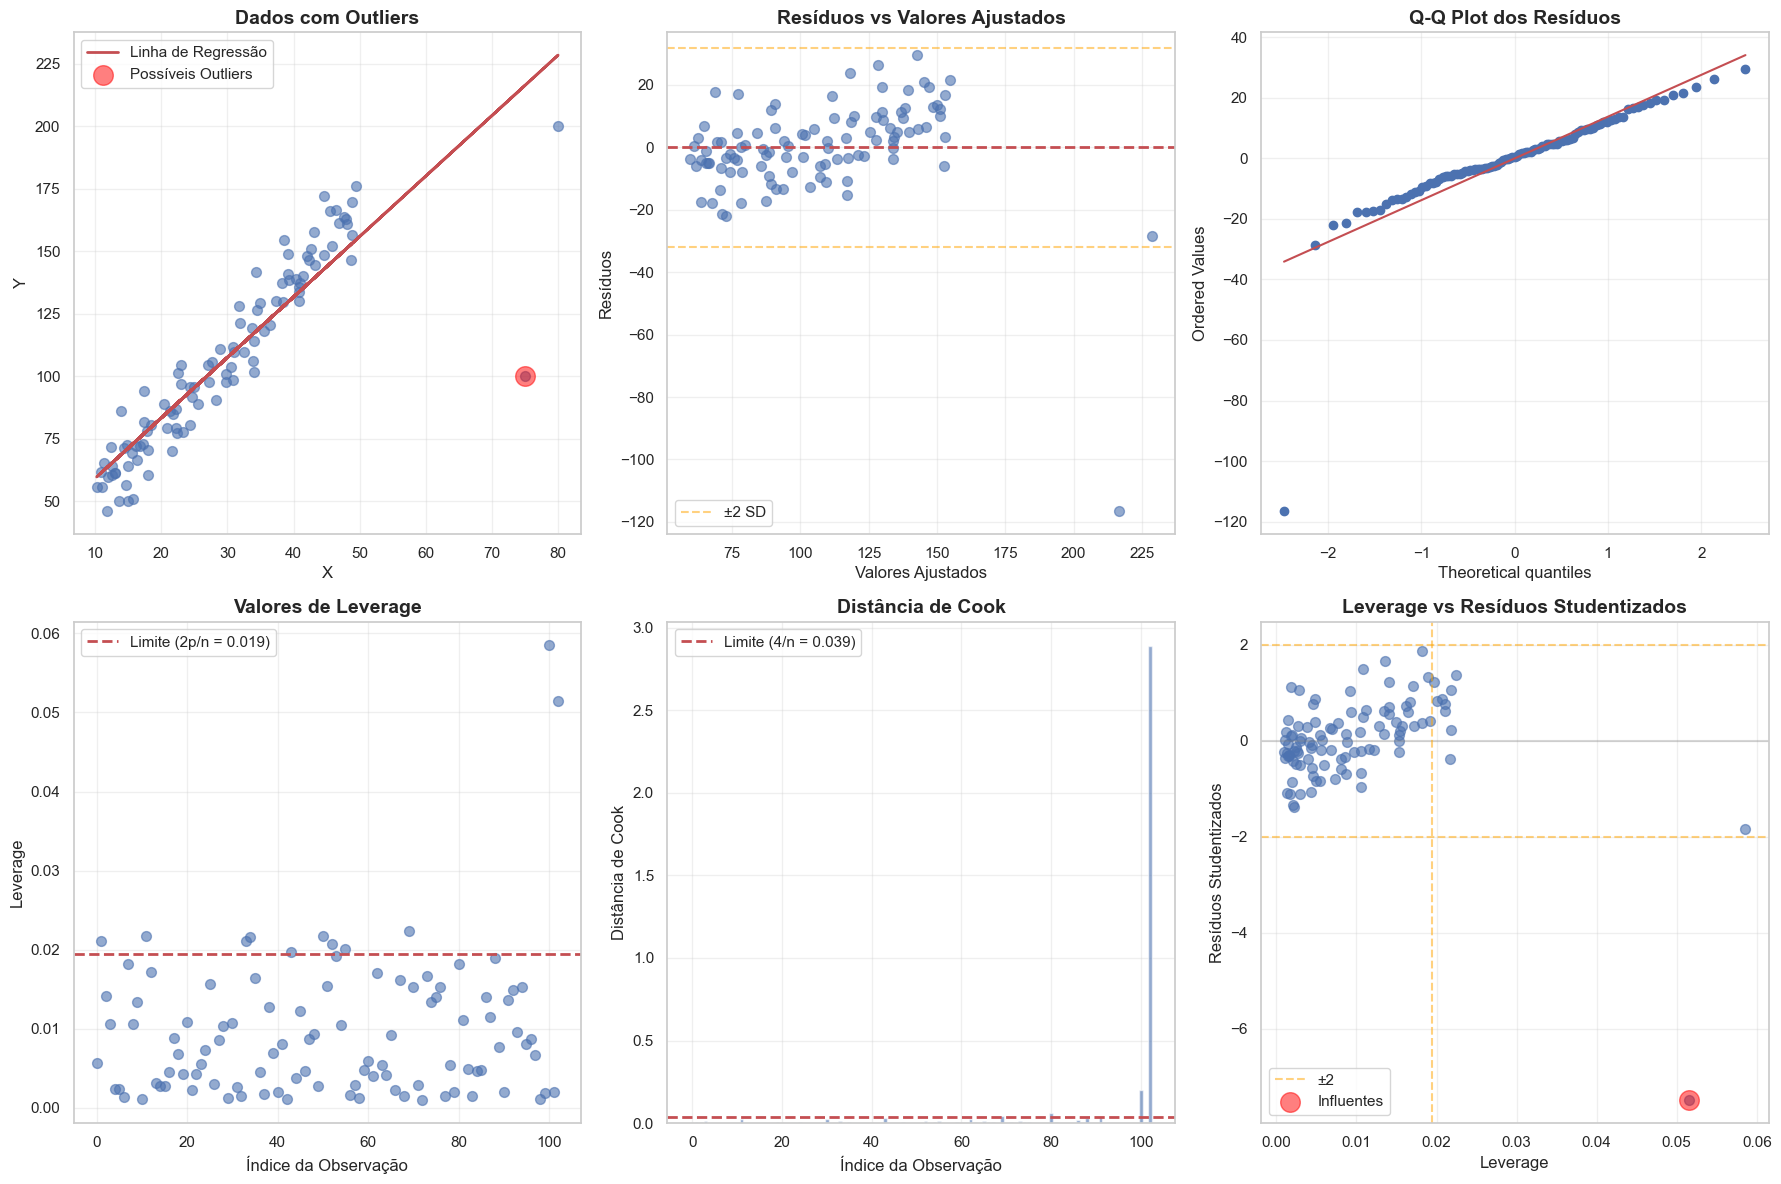

In [30]:
# Configuração de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# ==========================================
# 1. GERANDO DADOS COM OUTLIERS
# ==========================================

# Dados normais
np.random.seed(42)
X_normal = np.random.uniform(10, 50, 100).reshape(-1, 1)
y_normal = 3 * X_normal.flatten() + 20 + np.random.normal(0, 10, 100)

# Adicionando outliers de diferentes tipos
X_with_outliers = np.vstack([
    X_normal,
    [[80]],  # Alto leverage
    [[15]],  # Outlier no Y
    [[75]]   # Outlier influente
])

y_with_outliers = np.concatenate([
    y_normal,
    [200],   # Alto leverage (não muito influente)
    [50],    # Outlier no Y (baixo leverage)
    [100]    # Outlier influente
])

# ==========================================
# 2. MÉTRICAS DE DETECÇÃO
# ==========================================

def calculate_influence_metrics(X, y):
    """
    Calcula todas as métricas de influência
    """
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Resíduos
    residuals = y - y_pred
    
    # Resíduos padronizados
    mse = np.mean(residuals**2)
    std_residuals = residuals / np.sqrt(mse)
    
    # Matriz hat (leverage)
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    leverages = np.diag(H)
    
    # Resíduos studentizados
    n, p = X.shape
    student_residuals = residuals / (np.sqrt(mse * (1 - leverages)))
    
    # Distância de Cook
    cooks_d = (std_residuals**2 / p) * (leverages / (1 - leverages))
    
    # DFFITS
    dffits = student_residuals * np.sqrt(leverages / (1 - leverages))
    
    # DFBETAS (simplificado - apenas para intercepto)
    dfbetas = residuals / np.sqrt(mse * (1 - leverages))
    
    return {
        'residuals': residuals,
        'std_residuals': std_residuals,
        'leverages': leverages,
        'student_residuals': student_residuals,
        'cooks_d': cooks_d,
        'dffits': dffits,
        'dfbetas': dfbetas,
        'model': model,
        'y_pred': y_pred
    }

# Calculando métricas
metrics = calculate_influence_metrics(X_with_outliers, y_with_outliers)

# ==========================================
# 3. VISUALIZAÇÕES
# ==========================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 3.1 Scatter Plot com linha de regressão
ax = axes[0, 0]
ax.scatter(X_with_outliers, y_with_outliers, alpha=0.6, s=50)
ax.plot(X_with_outliers, metrics['y_pred'], 'r-', linewidth=2, label='Linha de Regressão')

# Destacar outliers potenciais
outlier_indices = np.where(np.abs(metrics['std_residuals']) > 2)[0]
if len(outlier_indices) > 0:
    ax.scatter(X_with_outliers[outlier_indices], 
               y_with_outliers[outlier_indices],
               color='red', s=200, alpha=0.5, 
               label='Possíveis Outliers')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Dados com Outliers', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 3.2 Resíduos vs Valores Ajustados
ax = axes[0, 1]
ax.scatter(metrics['y_pred'], metrics['residuals'], alpha=0.6, s=50)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.axhline(y=2*np.std(metrics['residuals']), color='orange', 
           linestyle='--', alpha=0.5, label='±2 SD')
ax.axhline(y=-2*np.std(metrics['residuals']), color='orange', 
           linestyle='--', alpha=0.5)
ax.set_xlabel('Valores Ajustados', fontsize=12)
ax.set_ylabel('Resíduos', fontsize=12)
ax.set_title('Resíduos vs Valores Ajustados', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 3.3 Q-Q Plot
ax = axes[0, 2]
stats.probplot(metrics['residuals'], dist="norm", plot=ax)
ax.set_title('Q-Q Plot dos Resíduos', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 3.4 Leverage (Hat Values)
ax = axes[1, 0]
n, p = X_with_outliers.shape
threshold_leverage = 2 * p / n
ax.scatter(range(len(metrics['leverages'])), metrics['leverages'], alpha=0.6, s=50)
ax.axhline(y=threshold_leverage, color='r', linestyle='--', 
           linewidth=2, label=f'Limite (2p/n = {threshold_leverage:.3f})')
ax.set_xlabel('Índice da Observação', fontsize=12)
ax.set_ylabel('Leverage', fontsize=12)
ax.set_title('Valores de Leverage', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 3.5 Distância de Cook
ax = axes[1, 1]
threshold_cook = 4 / n
ax.bar(range(len(metrics['cooks_d'])), metrics['cooks_d'], alpha=0.6)
ax.axhline(y=threshold_cook, color='r', linestyle='--', 
           linewidth=2, label=f'Limite (4/n = {threshold_cook:.3f})')
ax.set_xlabel('Índice da Observação', fontsize=12)
ax.set_ylabel("Distância de Cook", fontsize=12)
ax.set_title("Distância de Cook", fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 3.6 Leverage vs Resíduos Studentizados
ax = axes[1, 2]
ax.scatter(metrics['leverages'], metrics['student_residuals'], alpha=0.6, s=50)

# Linhas de referência
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax.axhline(y=2, color='orange', linestyle='--', alpha=0.5, label='±2')
ax.axhline(y=-2, color='orange', linestyle='--', alpha=0.5)
ax.axvline(x=threshold_leverage, color='orange', linestyle='--', alpha=0.5)

# Destacar outliers influentes
influential = (np.abs(metrics['student_residuals']) > 2) & (metrics['leverages'] > threshold_leverage)
if influential.any():
    ax.scatter(metrics['leverages'][influential], 
               metrics['student_residuals'][influential],
               color='red', s=200, alpha=0.5, 
               label='Influentes')

ax.set_xlabel('Leverage', fontsize=12)
ax.set_ylabel('Resíduos Studentizados', fontsize=12)
ax.set_title('Leverage vs Resíduos Studentizados', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outliers_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# ==========================================
# 4. RELATÓRIO DE OUTLIERS
# ==========================================

print("=" * 80)
print("RELATÓRIO DE DIAGNÓSTICO DE OUTLIERS E PONTOS INFLUENTES")
print("=" * 80)

# Thresholds
threshold_leverage = 2 * p / n
threshold_cook = 4 / n
threshold_dffits = 2 * np.sqrt(p / n)

# Identificação de outliers
outliers_residuals = np.abs(metrics['std_residuals']) > 2
outliers_leverage = metrics['leverages'] > threshold_leverage
outliers_cook = metrics['cooks_d'] > threshold_cook
outliers_dffits = np.abs(metrics['dffits']) > threshold_dffits

print(f"\n1. LIMITES DE DETECÇÃO:")
print(f"   - Resíduos Padronizados: ±2")
print(f"   - Leverage: {threshold_leverage:.4f}")
print(f"   - Distância de Cook: {threshold_cook:.4f}")
print(f"   - DFFITS: ±{threshold_dffits:.4f}")

print(f"\n2. RESUMO DE DETECÇÕES:")
print(f"   - Outliers nos resíduos: {outliers_residuals.sum()} observações")
print(f"   - Alto leverage: {outliers_leverage.sum()} observações")
print(f"   - Alto Cook's D: {outliers_cook.sum()} observações")
print(f"   - Alto DFFITS: {outliers_dffits.sum()} observações")

# Pontos problemáticos
problematic = outliers_residuals | outliers_leverage | outliers_cook | outliers_dffits

if problematic.any():
    print(f"\n3. OBSERVAÇÕES PROBLEMÁTICAS:")
    print(f"\n{'Idx':<6}{'X':<10}{'Y':<10}{'Resíduo':<12}{'Leverage':<12}{'Cook D':<12}{'Status':<30}")
    print("-" * 90)
    
    for idx in np.where(problematic)[0]:
        status = []
        if outliers_residuals[idx]:
            status.append("OutlierY")
        if outliers_leverage[idx]:
            status.append("HighLeverage")
        if outliers_cook[idx]:
            status.append("Influente")
        
        print(f"{idx:<6}{X_with_outliers[idx,0]:<10.2f}{y_with_outliers[idx]:<10.2f}"
              f"{metrics['residuals'][idx]:<12.2f}{metrics['leverages'][idx]:<12.4f}"
              f"{metrics['cooks_d'][idx]:<12.4f}{', '.join(status):<30}")

# ==========================================
# 5. COMPARAÇÃO: COM vs SEM OUTLIERS
# ==========================================

print(f"\n4. IMPACTO DOS OUTLIERS NO MODELO:")

# Modelo sem outliers influentes
mask_clean = ~(outliers_cook)
X_clean = X_with_outliers[mask_clean]
y_clean = y_with_outliers[mask_clean]

model_with_outliers = metrics['model']
model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)

print(f"\n   Com outliers:")
print(f"   - Coeficiente (β₁): {model_with_outliers.coef_[0]:.4f}")
print(f"   - Intercepto (β₀): {model_with_outliers.intercept_:.4f}")
print(f"   - R²: {model_with_outliers.score(X_with_outliers, y_with_outliers):.4f}")

print(f"\n   Sem outliers influentes:")
print(f"   - Coeficiente (β₁): {model_clean.coef_[0]:.4f}")
print(f"   - Intercepto (β₀): {model_clean.intercept_:.4f}")
print(f"   - R²: {model_clean.score(X_clean, y_clean):.4f}")

diff_coef = abs(model_with_outliers.coef_[0] - model_clean.coef_[0])
diff_intercept = abs(model_with_outliers.intercept_ - model_clean.intercept_)

print(f"\n   Diferenças:")
print(f"   - Δ Coeficiente: {diff_coef:.4f} ({diff_coef/model_clean.coef_[0]*100:.2f}%)")
print(f"   - Δ Intercepto: {diff_intercept:.4f} ({diff_intercept/model_clean.intercept_*100:.2f}%)")

# ==========================================
# 6. RECOMENDAÇÕES
# ==========================================

print(f"\n5. RECOMENDAÇÕES:")

if problematic.any():
    print("\n   ⚠️  AÇÕES SUGERIDAS:")
    print("   1. Investigar as observações problemáticas identificadas")
    print("   2. Verificar se são erros de medição ou digitação")
    print("   3. Considerar:")
    print("      - Remoção (se erro comprovado)")
    print("      - Transformação das variáveis (log, sqrt)")
    print("      - Regressão robusta (Huber, RANSAC)")
    print("      - Manter se forem valores legítimos mas raros")
else:
    print("\n   ✓ Nenhum outlier influente detectado!")
    print("   O modelo está bem especificado neste aspecto.")

print("\n" + "=" * 80)

# ==========================================
# 7. MÉTODOS DE TRATAMENTO
# ==========================================

print("\n6. EXEMPLO DE MÉTODOS ROBUSTOS:")

from sklearn.linear_model import HuberRegressor, RANSACRegressor

# Regressão de Huber
huber = HuberRegressor()
huber.fit(X_with_outliers, y_with_outliers)

# RANSAC
ransac = RANSACRegressor(random_state=42)
ransac.fit(X_with_outliers, y_with_outliers)

print(f"\n   Regressão Linear (OLS):")
print(f"   - Coeficiente: {model_with_outliers.coef_[0]:.4f}")

print(f"\n   Regressão de Huber (robusta):")
print(f"   - Coeficiente: {huber.coef_[0]:.4f}")

print(f"\n   RANSAC (muito robusta):")
print(f"   - Coeficiente: {ransac.estimator_.coef_[0]:.4f}")
print(f"   - Inliers identificados: {ransac.inlier_mask_.sum()}/{len(y_with_outliers)}")

print("\n" + "=" * 80)

RELATÓRIO DE DIAGNÓSTICO DE OUTLIERS E PONTOS INFLUENTES

1. LIMITES DE DETECÇÃO:
   - Resíduos Padronizados: ±2
   - Leverage: 0.0194
   - Distância de Cook: 0.0388
   - DFFITS: ±0.1971

2. RESUMO DE DETECÇÕES:
   - Outliers nos resíduos: 1 observações
   - Alto leverage: 11 observações
   - Alto Cook's D: 4 observações
   - Alto DFFITS: 4 observações

3. OBSERVAÇÕES PROBLEMÁTICAS:

Idx   X         Y         Resíduo     Leverage    Cook D      Status                        
------------------------------------------------------------------------------------------
1     48.03     161.10    9.87        0.0211      0.0082      HighLeverage                  
11    48.80     169.68    16.59       0.0218      0.0241      HighLeverage                  
33    47.96     163.12    12.07       0.0210      0.0123      HighLeverage                  
34    48.63     146.69    -5.98       0.0216      0.0031      HighLeverage                  
43    46.37     166.64    19.41       0.0197      0.0297 